# Rainfall Prediction-Weather Forecasting
![rain](https://c.tenor.com/9i_gbz08VCsAAAAM/pouring-rain-raoin-cloud.gif)

## Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

**"Some people walk in the rain, others just get wet."** -
 **Roger Miller**.  

Rains are a vital part of our lives. Clouds give the gift of rains to humans. Weather department tries to forecast when will it rain. So, I try to predict whether it will rain in Australia tomorrow or not and also how much rainfall could be there.

**Rainfall Prediction is:** 
one of the difficult and uncertain tasks that have a significant impact on human society. Timely and accurate forecasting can proactively help reduce human and financial loss. This study presents a set of experiments that involve the use of common machine learning techniques to create models that can predict whether it will rain tomorrow or not based on the weather data for that day in major cities in Australia.

# Problem Definition

* >In this kernel, we will try to answer the question that whether or not it will rain tomorrow and also how much rainfall could be there in Australia. 
* >For the same we will build two Models, One a classifier model to predict whether or not it will rain tomorrow in Australia. and another, regression model to find how much rainfall could be there in Australia. 

# So, let's get started with First Machine Learning Model to forecast whether or not it will rain tomorrow


# Import libraries

In [321]:
import numpy as np 
import pandas as pd 
import warnings

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore')

# Import dataset

In [322]:
df = pd.read_csv("weatherAUS.csv")

# Exploratory Data Analysis

In [291]:
# Preview the dataset
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [196]:
# No. of Rows and Columns
df.shape

(8425, 23)

* We can see that there are 8425 instances and 23 variables in the data set.

In [197]:
#View summary of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

#### Observation

- We can see that the dataset contains mixture of categorical and numerical variables.

- Categorical variables have data type `object`.

- Numerical variables have data type `float64`.

- Also, there are some missing values in the dataset. We will explore it later.

In [198]:
# View statistical properties of dataset 
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        50.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7116.000000  7113.000000  6004.000000  5970.000000  8369.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.828699     6.766681     2.877658     2.731659     5.627035   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.000000  1010.400000     1.000000     2.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.800000   
75%    1022.300000  1019.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8329.000000  
mean     22.442934  
std       5.980020  
min       7.300000  
25%      18.000000  
50%      21.900000  
75%      26.400000  
max      44.100000

In [199]:
# View column names 
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [200]:
# duplicate columns
df.duplicated().sum()

1663

In [201]:
# drop duplicate values
df.drop_duplicates(inplace = True)

# Data Visualization

In [202]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [203]:
# create a table with data missing 
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing , 
     'data type' : df.dtypes
}
frame=pd.DataFrame(value)
frame


missing_values   percent_missing % data type
Date                         0           0.000000    object
Location                     0           0.000000    object
MinTemp                     70           1.035197   float64
MaxTemp                     57           0.842946   float64
Rainfall                   138           2.040816   float64
Evaporation               2921          43.197279   float64
Sunshine                  3236          47.855664   float64
WindGustDir                942          13.930790    object
WindGustSpeed              942          13.930790   float64
WindDir9am                 794          11.742088    object
WindDir3pm                 294           4.347826    object
WindSpeed9am                63           0.931677   float64
WindSpeed3pm               100           1.478852   float64
Humidity9am                 54           0.798580   float64
Humidity3pm                 96           1.419698   float64
Pressure9am               1308          19.343390   float64
Pressure3pm               1311          19.387755   float64
Cloud9am                  1866          27.595386   float64
Cloud3pm                  1902          28.127773   float64
Temp9am                     51           0.754215   float64
Temp3pm                     92           1.360544   float64
RainToday                  138           2.040816    object
RainTomorrow               138           2.040816    object

<AxesSubplot:>

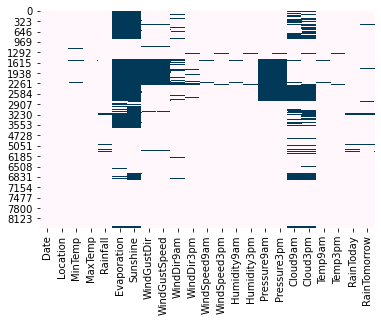

In [204]:
# Missing Data Pattern in Training Data
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

Obviously, “Evaporation”, “Sunshine”, “Cloud9am”, “Cloud3pm” are the features with a high missing percentage. So we will check the details of the missing data for these 4 features.

In [205]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

Total   Percent
Sunshine      3236  0.478557
Evaporation   2921  0.431973
Cloud3pm      1902  0.281278
Cloud9am      1866  0.275954

We observe that the 4 features have less than 50 per cent missing data. So instead of rejecting them completely, we’ll consider them in our model with proper imputation.

In [206]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [207]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [208]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

In [209]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          4.2       3.8   
1     2008-12-02   Albury      7.4     25.1       0.0          8.0       9.9   
2     2008-12-03   Albury     12.9     25.7       0.0          2.0       5.8   
3     2008-12-04   Albury      9.2     28.0       0.0          2.8      10.1   
4     2008-12-05   Albury     17.5     32.3       1.0          1.2       9.5   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          7.6       9.9   
8421  2017-06-22    Uluru      3.6     25.3       0.0          9.4      12.1   
8422  2017-06-23    Uluru      5.4     26.9       0.0          2.4       6.7   
8423  2017-06-24    Uluru      7.8     27.0       0.0          4.0       0.0   
8424  2017-06-25    Uluru     14.9      NaN       0.0         10.2      13.1   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       7.0     16.9     21.8   
1          1010.6       1007.8       4.0       1.0     17.2     24.3   
2          1007.6       1008.7       8.0       2.0     21.0     23.2   
3          1017.6       1012.8       0.0       2.0     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       7.0       4.0     10.1     22.4   
8421       1023.5       1019.1       1.0       5.0     10.9     24.5   
8422       1021.0       1016.8       8.0       6.0     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[6762 rows x 23 columns]

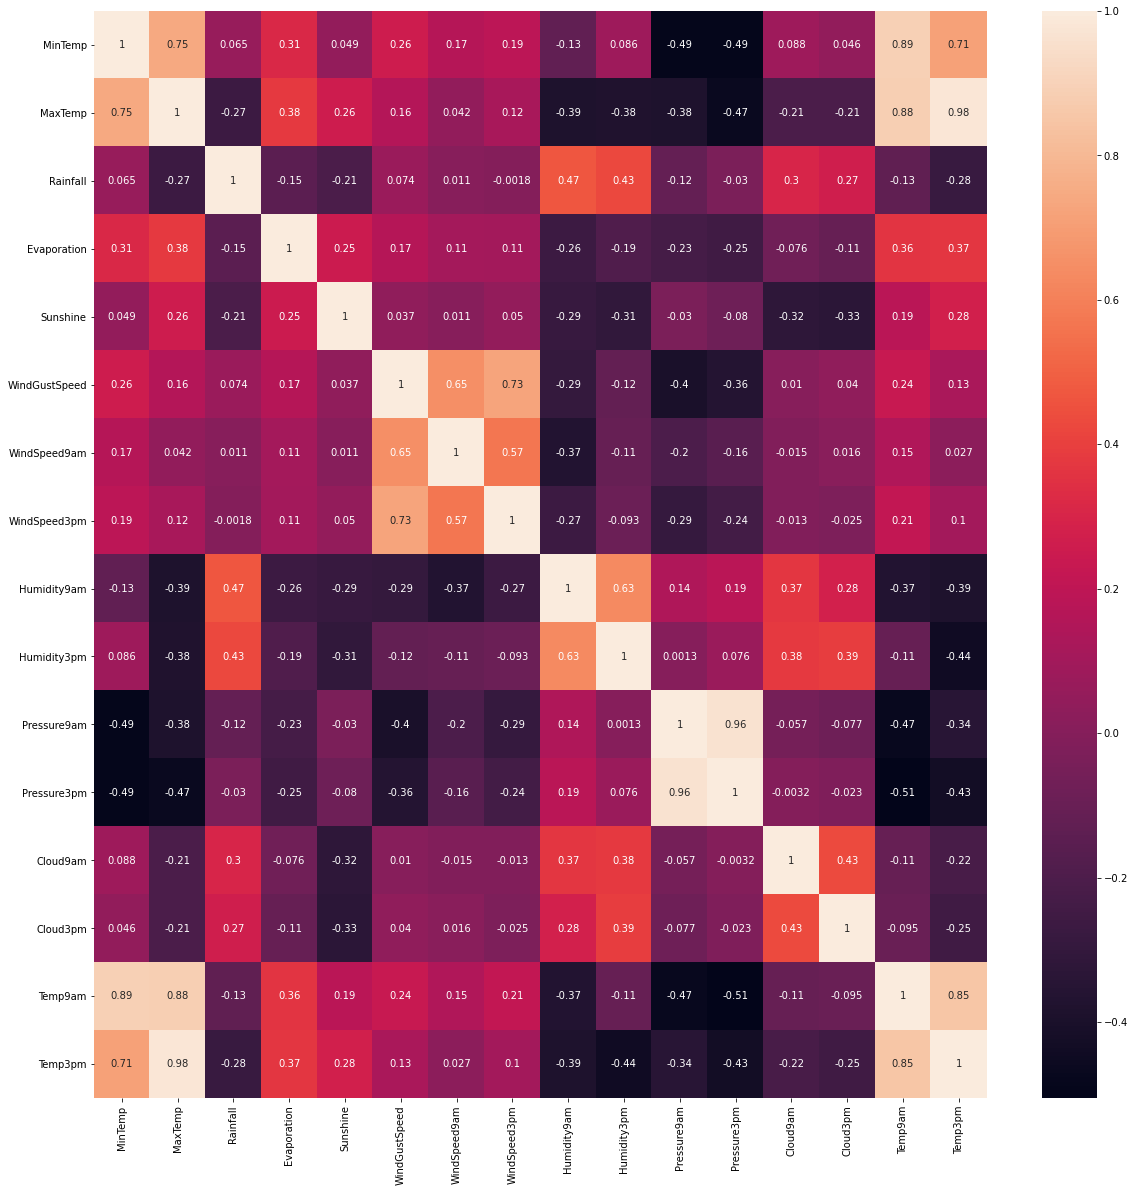

In [210]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

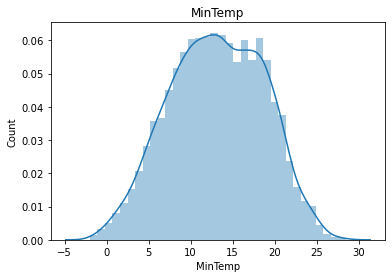

<Figure size 1080x1080 with 0 Axes>

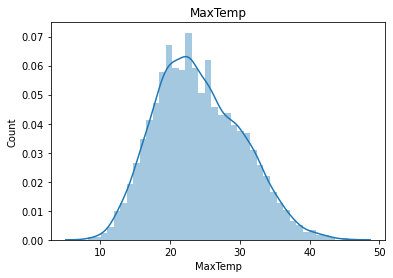

<Figure size 1080x1080 with 0 Axes>

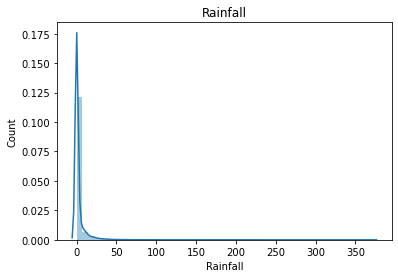

<Figure size 1080x1080 with 0 Axes>

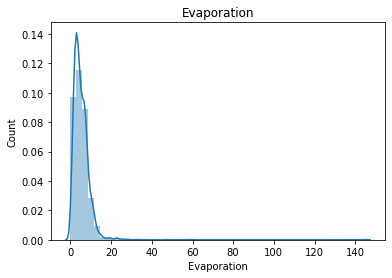

<Figure size 1080x1080 with 0 Axes>

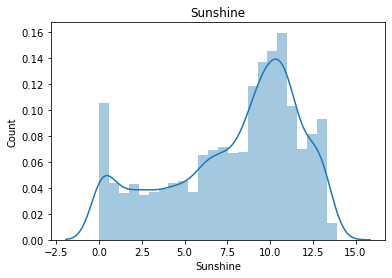

<Figure size 1080x1080 with 0 Axes>

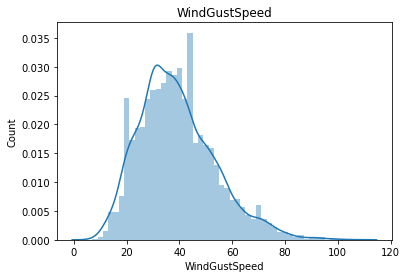

<Figure size 1080x1080 with 0 Axes>

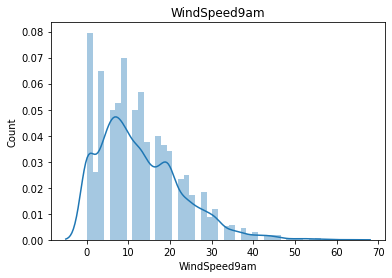

<Figure size 1080x1080 with 0 Axes>

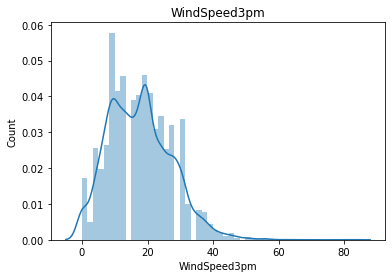

<Figure size 1080x1080 with 0 Axes>

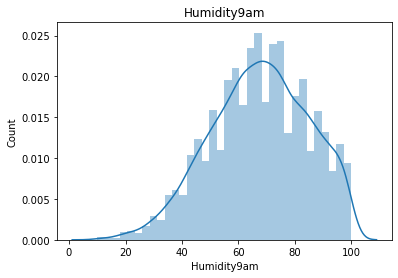

<Figure size 1080x1080 with 0 Axes>

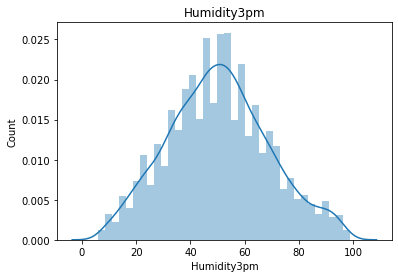

<Figure size 1080x1080 with 0 Axes>

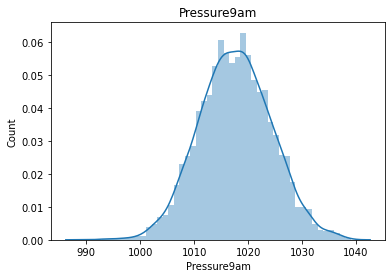

<Figure size 1080x1080 with 0 Axes>

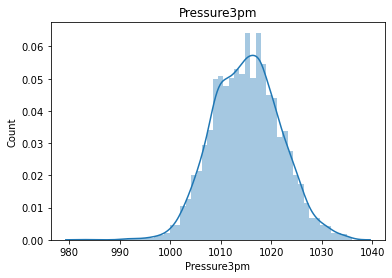

<Figure size 1080x1080 with 0 Axes>

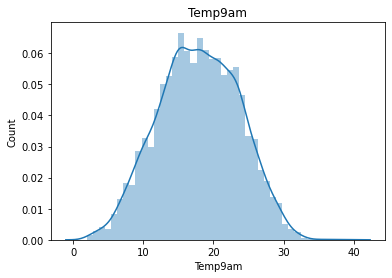

<Figure size 1080x1080 with 0 Axes>

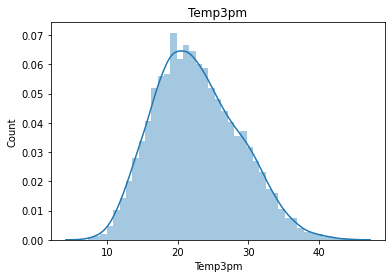

<Figure size 1080x1080 with 0 Axes>

In [211]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

* > almost all have normal distribution except 'Rainfall'

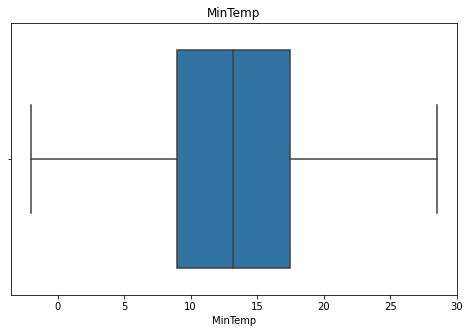

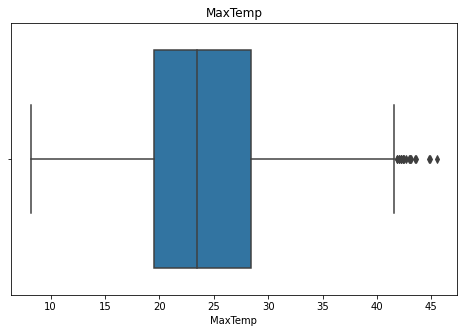

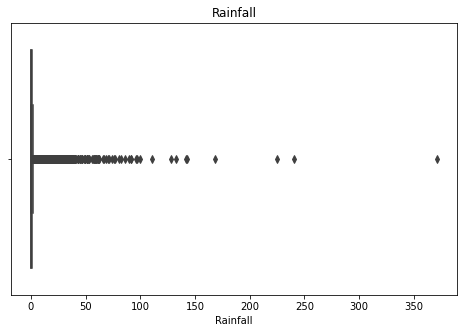

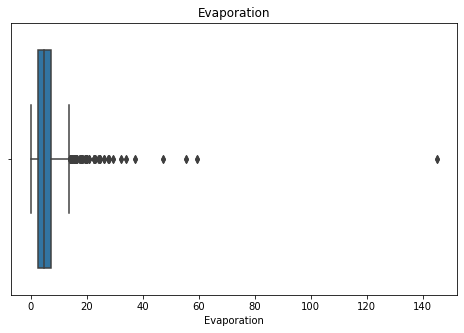

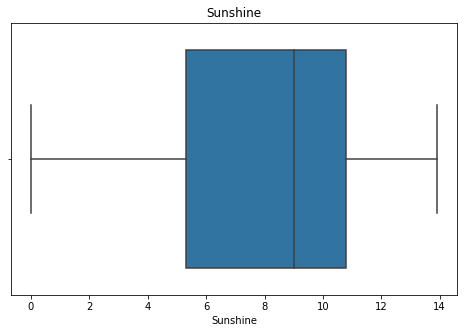

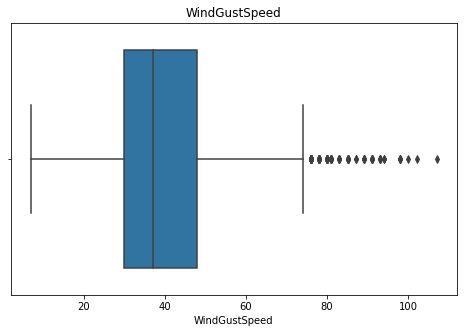

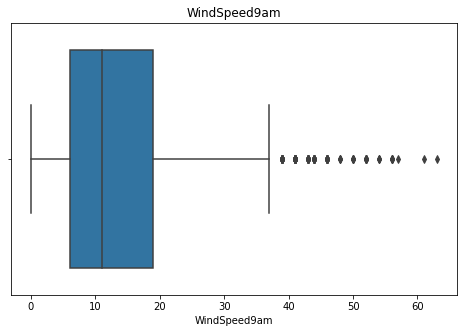

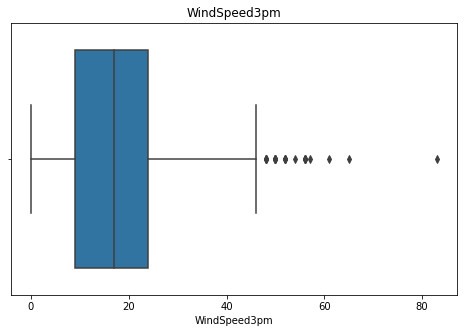

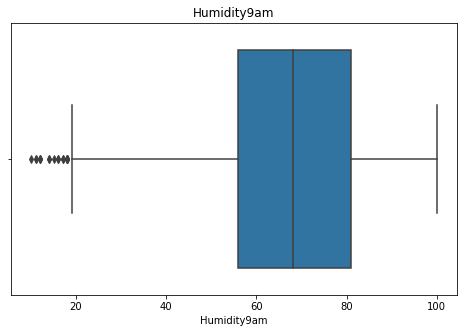

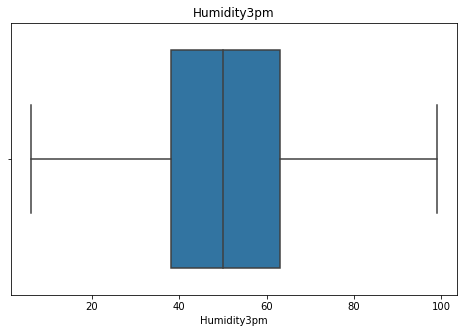

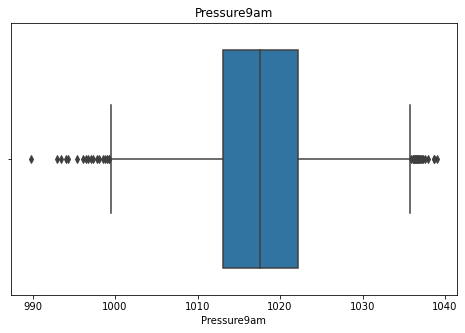

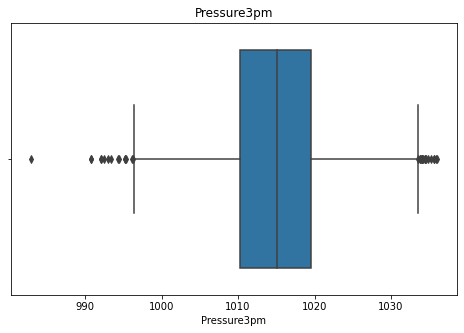

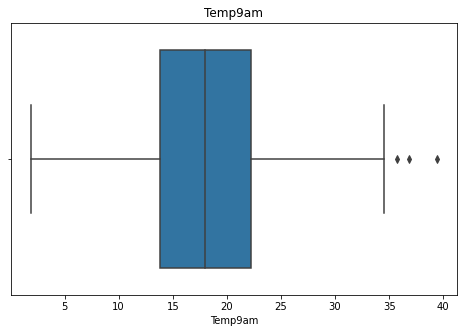

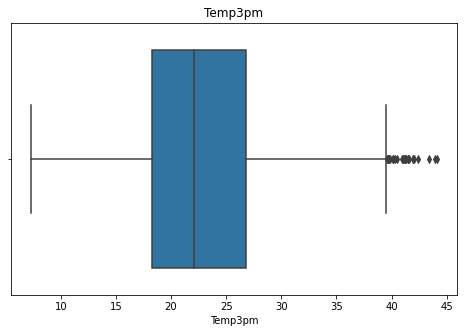

In [212]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    plt.figure(figsize=(8,5))
    sns.boxplot(data[feature])
    plt.title(feature)
    

* >All the columns except 'MinTemp','Sunshine' and 'Humidity3pm' have outliers

In [213]:
# impute missing values in Continous Features

for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())


In [214]:
# Check missing values again
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation       0.000000
Sunshine          0.000000
WindGustDir      13.930790
WindGustSpeed     0.000000
WindDir9am       11.742088
WindDir3pm        4.347826
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           0.000000
Temp3pm           0.000000
RainToday         2.040816
RainTomorrow      2.040816
dtype: float64

* > no misssing values in Continous Feature

In [215]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [216]:
# Imputing missing values in discrete_feature
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

In [217]:
# Encoding
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          4.2       3.8   
1     2008-12-02   Albury      7.4     25.1       0.0          8.0       9.9   
2     2008-12-03   Albury     12.9     25.7       0.0          2.0       5.8   
3     2008-12-04   Albury      9.2     28.0       0.0          2.8      10.1   
4     2008-12-05   Albury     17.5     32.3       1.0          1.2       9.5   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          7.6       9.9   
8421  2017-06-22    Uluru      3.6     25.3       0.0          9.4      12.1   
8422  2017-06-23    Uluru      5.4     26.9       0.0          2.4       6.7   
8423  2017-06-24    Uluru      7.8     27.0       0.0          4.0       0.0   
8424  2017-06-25    Uluru     14.9     23.5       0.0         10.2      13.1   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN           37.0        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       7.0     16.9     21.8   
1          1010.6       1007.8       4.0       1.0     17.2     24.3   
2          1007.6       1008.7       8.0       2.0     21.0     23.2   
3          1017.6       1012.8       0.0       2.0     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       7.0       4.0     10.1     22.4   
8421       1023.5       1019.1       1.0       5.0     10.9     24.5   
8422       1021.0       1016.8       8.0       6.0     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  
...         ...           ...  
8420          0             0  
8421          0             0  
8422          0             0  
8423          0             0  
8424          0             0  

[6762 rows x 23 columns]

In [218]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2016-04-30', '2017-03-04', '2015-11-03', '2017-02-27', '2017-02-28',
       '2017-03-01', '2017-03-02', '2017-03-03', '2013-04-12', '2015-04-29',
       ...
       '2013-01-11', '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
       '2013-01-05', '2013-01-04', '2013-01-03', '2013-01-02', '2017-06-25'],
      dtype='object', name='Date', length=3004)
Location Index(['CoffsHarbour', 'Wollongong', 'Melbourne', 'Williamtown', 'Newcastle',
       'Penrith', 'Brisbane', 'Adelaide', 'Albury', 'PerthAirport', 'Darwin',
       'Uluru'],
      dtype='object', name='Location')
WindGustDir Index(['NW', 'NNW', 'N', 'WNW', 'SSW', 'S', 'WSW', 'SW', 'SSE', 'NNE', 'NE',
       'SE', 'ESE', 'W', 'ENE', 'E'],
      dtype='object', name='WindGustDir')
WindDir9am Index(['N', 'WNW', 'SW', 'NNE', 'NNW', 'W', 'SSW', 'WSW', 'ESE', 'NW', 'NE',
       'S', 'SSE', 'SE', 'ENE', 'E'],
      dtype='object', name='WindDir9am')
WindDir3pm Index(['NNW', 'SSW', 'N', 'NW', 'S', 'WNW', 'SE', 'NNE', 'E

In [219]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [220]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

* > no missing values, good to move ahead

In [221]:
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()
df1

RainTomorrow      0      1
Location                  
Adelaide      160.0   45.0
Albury        708.0  199.0
Brisbane      444.0  135.0
CoffsHarbour  425.0  186.0
Darwin        218.0   32.0
Melbourne     608.0  203.0
Newcastle     624.0  198.0
Penrith       366.0  116.0
PerthAirport  962.0  242.0
Uluru          39.0    NaN
Williamtown   462.0  153.0
Wollongong    174.0   63.0

In [222]:
# Datetime formating
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [223]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

In [224]:
df

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0    2008-12-01         1     13.4     22.9       0.6          4.2       3.8   
1    2008-12-02         1      7.4     25.1       0.0          8.0       9.9   
2    2008-12-03         1     12.9     25.7       0.0          2.0       5.8   
3    2008-12-04         1      9.2     28.0       0.0          2.8      10.1   
4    2008-12-05         1     17.5     32.3       1.0          1.2       9.5   
...         ...       ...      ...      ...       ...          ...       ...   
8420 2017-06-21         9      2.8     23.4       0.0          7.6       9.9   
8421 2017-06-22         9      3.6     25.3       0.0          9.4      12.1   
8422 2017-06-23         9      5.4     26.9       0.0          2.4       6.7   
8423 2017-06-24         9      7.8     27.0       0.0          4.0       0.0   
8424 2017-06-25         9     14.9     23.5       0.0         10.2      13.1   

      WindGustDir  WindGustSpeed  WindDir9am  ...  Pressure9am  Pressure3pm  \
0             4.0           44.0         5.0  ...       1007.7       1007.1   
1             2.0           44.0         0.0  ...       1010.6       1007.8   
2             5.0           46.0         5.0  ...       1007.6       1008.7   
3            11.0           24.0        13.0  ...       1017.6       1012.8   
4             4.0           41.0        12.0  ...       1010.8       1006.0   
...           ...            ...         ...  ...          ...          ...   
8420         15.0           31.0        13.0  ...       1024.6       1020.3   
8421          0.0           22.0        13.0  ...       1023.5       1019.1   
8422          3.0           37.0        13.0  ...       1021.0       1016.8   
8423         12.0           28.0        11.0  ...       1019.4       1016.5   
8424         15.0           37.0        14.0  ...       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0          8.0       7.0     16.9     21.8          0             0   
1          4.0       1.0     17.2     24.3          0             0   
2          8.0       2.0     21.0     23.2          0             0   
3          0.0       2.0     18.1     26.5          0             0   
4          7.0       8.0     17.8     29.7          0             0   
...        ...       ...      ...      ...        ...           ...   
8420       7.0       4.0     10.1     22.4          0             0   
8421       1.0       5.0     10.9     24.5          0             0   
8422       8.0       6.0     12.5     26.1          0             0   
8423       3.0       2.0     15.1     26.0          0             0   
8424       8.0       8.0     15.0     20.9          0             0   

      Date_month  Date_day  
0             12         1  
1             12         2  
2             12         3  
3             12         4  
4             12         5  
...          ...       ...  
8420           6        21  
8421           6        22  
8422           6        23  
8423           6        24  
8424           6        25  

[6762 rows x 25 columns]

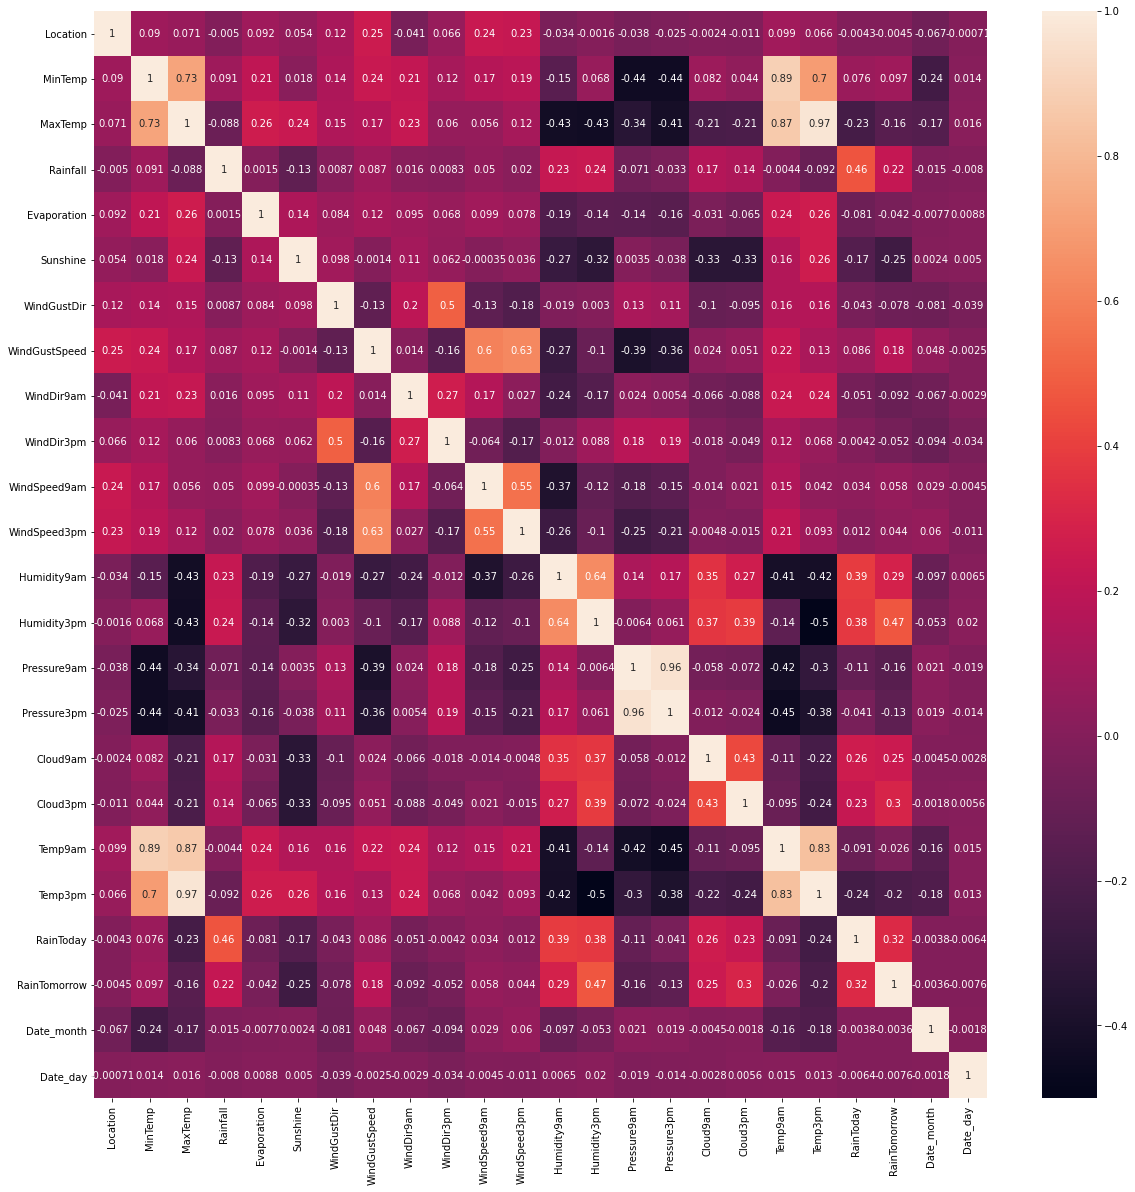

In [225]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

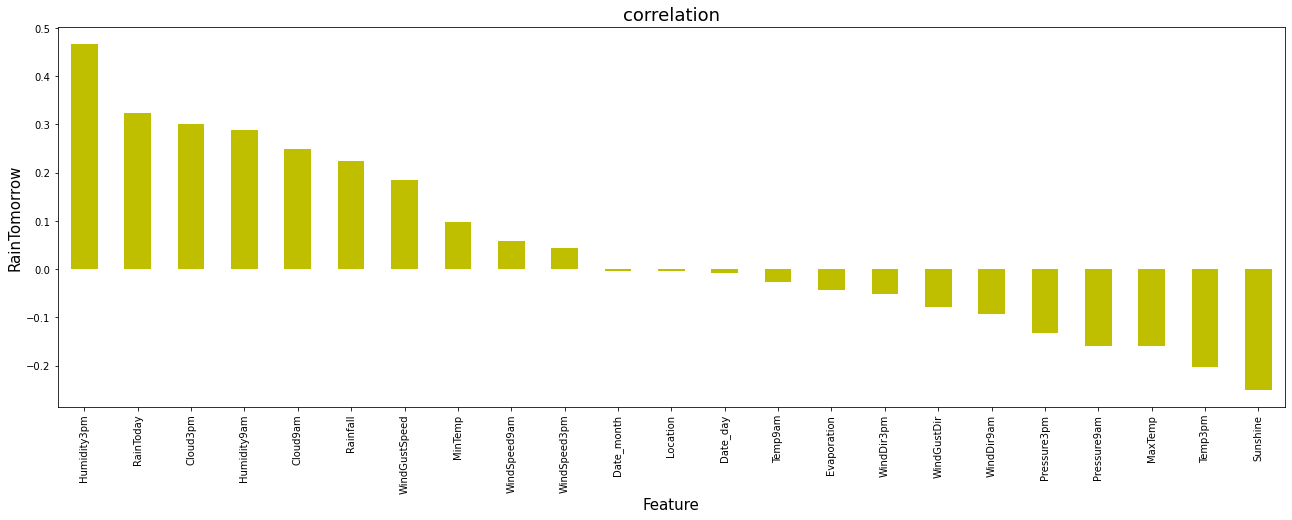

In [226]:
plt.figure(figsize=(22,7))
df.corr()['RainTomorrow'].sort_values(ascending = False).drop(['RainTomorrow']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('RainTomorrow', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

### Summary of categorical variables <a class="anchor" id="6.3"></a>


- There is a date variable. It is denoted by `Date` column.


- All the columns have very good correlation with our target column except `Location` , `Date` and`Temp9am`


- There are 6 categorical variables. These are given by `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` and  `RainTomorrow`.


- There are two binary categorical variables - `RainToday` and  `RainTomorrow`.


- `RainTomorrow` is the target variable.

In [227]:
# view frequency of categorical variables

for var in categorical: 
    print(df[var].value_counts())

2011-02-17    4
2011-03-11    4
2011-03-12    4
2011-05-17    4
2011-05-16    4
             ..
2016-01-26    1
2016-10-29    1
2012-11-29    1
2015-12-20    1
2016-07-30    1
Name: Date, Length: 3004, dtype: int64
8     1204
1      907
6      822
5      811
10     615
3      611
2      579
7      482
4      250
11     237
0      205
9       39
Name: Location, dtype: int64
15.0    1460
9.0      465
3.0      459
4.0      434
5.0      420
2.0      398
10.0     390
7.0      376
12.0     370
14.0     357
11.0     300
8.0      299
1.0      296
6.0      287
13.0     267
0.0      184
Name: WindGustDir, dtype: int64
1.0     1403
7.0      590
2.0      463
13.0     439
12.0     397
6.0      394
8.0      368
9.0      364
15.0     338
3.0      337
10.0     324
4.0      301
11.0     300
5.0      299
14.0     229
0.0      216
Name: WindDir9am, dtype: int64
10.0    971
6.0     499
8.0     493
11.0    480
9.0     428
12.0    421
0.0     400
4.0     399
14.0    392
3.0     389
15.0    363
2.0     354
1

In [228]:
# view frequency distribution of categorical variables

for var in categorical_feature: 
    
    print(df[var].value_counts()/np.float(len(df)))

2011-02-17    0.000592
2011-03-11    0.000592
2011-03-12    0.000592
2011-05-17    0.000592
2011-05-16    0.000592
                ...   
2016-01-26    0.000148
2016-10-29    0.000148
2012-11-29    0.000148
2015-12-20    0.000148
2016-07-30    0.000148
Name: Date, Length: 3004, dtype: float64
8     0.178054
1     0.134132
6     0.121562
5     0.119935
10    0.090949
3     0.090358
2     0.085626
7     0.071281
4     0.036971
11    0.035049
0     0.030316
9     0.005768
Name: Location, dtype: float64
15.0    0.215912
9.0     0.068767
3.0     0.067879
4.0     0.064182
5.0     0.062112
2.0     0.058858
10.0    0.057675
7.0     0.055605
12.0    0.054718
14.0    0.052795
11.0    0.044366
8.0     0.044218
1.0     0.043774
6.0     0.042443
13.0    0.039485
0.0     0.027211
Name: WindGustDir, dtype: float64
1.0     0.207483
7.0     0.087252
2.0     0.068471
13.0    0.064922
12.0    0.058710
6.0     0.058267
8.0     0.054422
9.0     0.053830
15.0    0.049985
3.0     0.049837
10.0    0.047915
4.

In [229]:
# check for cardinality in categorical variables

for var in categorical_feature:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3004  labels
Location  contains  12  labels
WindGustDir  contains  16  labels
WindDir9am  contains  16  labels
WindDir3pm  contains  16  labels
RainToday  contains  2  labels
RainTomorrow  contains  2  labels


#### We can see that there is a `Date` variable which needs to be preprocessed. I will do preprocessing in the following section.


#### All the other variables contain relatively smaller number of variables.

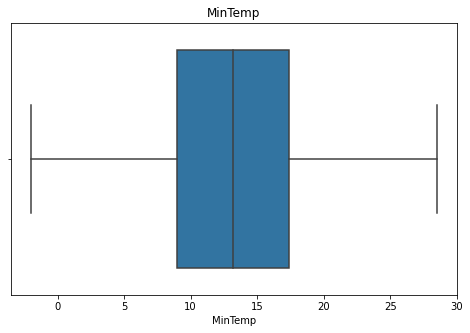

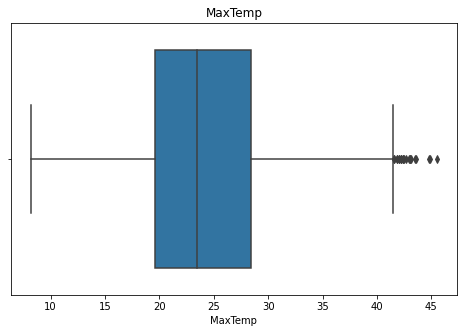

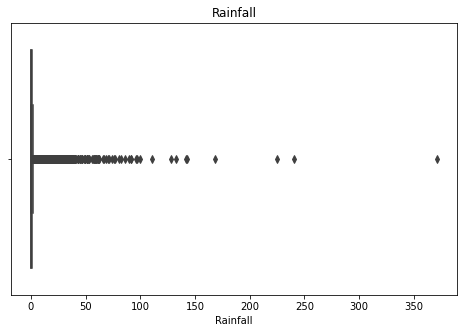

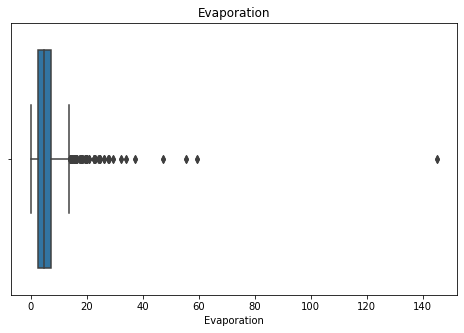

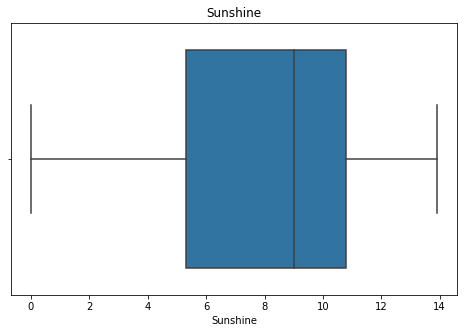

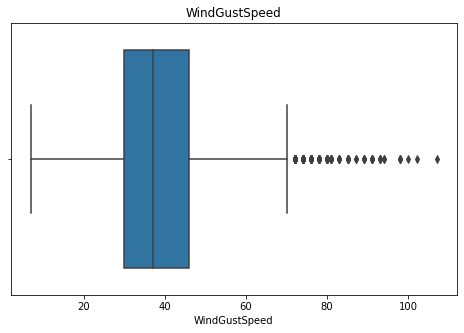

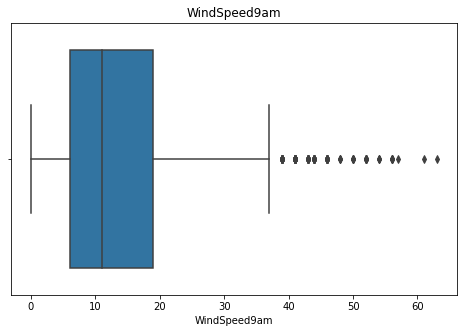

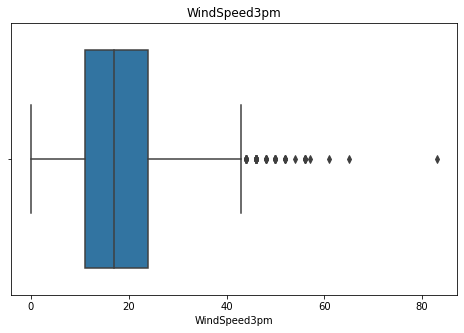

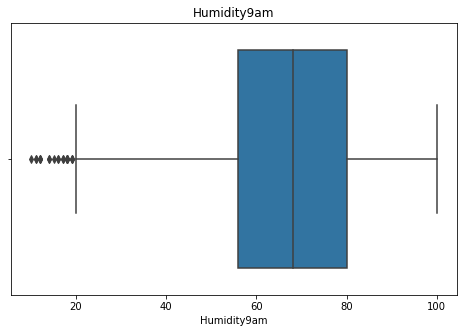

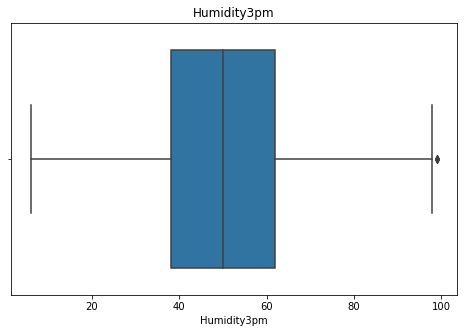

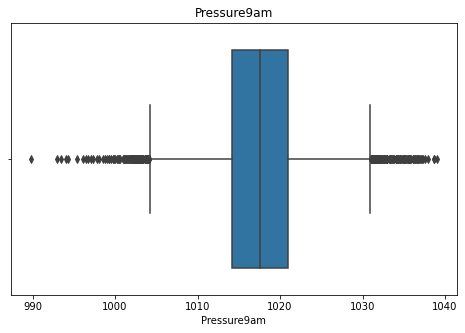

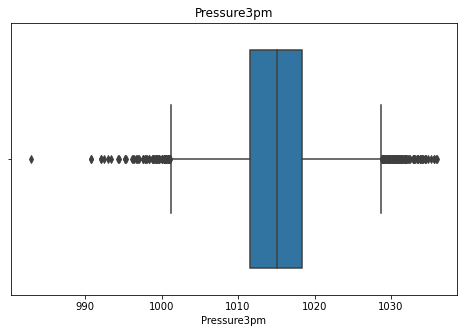

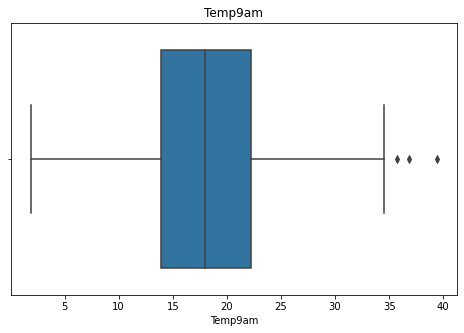

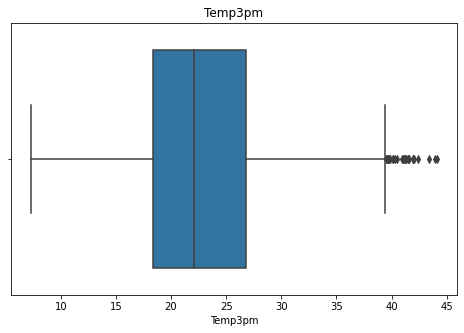

In [230]:
for feature in continuous_feature:
    data=df.copy()
    plt.figure(figsize=(8,5))
    sns.boxplot(data[feature])
    plt.title(feature)
   

In [231]:
for feature in continuous_feature:
    print(feature)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm


## Outlier Removal

In [232]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-3.599999999999998 29.999999999999996


In [233]:
df.loc[df['MinTemp']>=30.45,'MinTemp']=30.45
df.loc[df['MinTemp']<=-5.95,'MinTemp']=-5.95

In [234]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

6.400000000000006 41.599999999999994


In [235]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

6.400000000000006 41.599999999999994


In [236]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.7,'MaxTemp']=2.7

In [237]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.2000000000000002 2.0


In [238]:
df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

In [239]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.0 13.600000000000001


In [240]:
df.loc[df['Evaporation']>=14.6,'Evaporation']=14.6
df.loc[df['Evaporation']<=-4.6,'Evaporation']=-4.6

In [241]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

6.0 70.0


In [242]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [243]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-13.5 38.5


In [244]:
df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [245]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-8.5 43.5


In [246]:
df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [247]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

20.0 116.0


In [248]:
df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

In [249]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1004.1500000000001 1030.9499999999998


In [250]:
df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05

In [251]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1001.1500000000001 1028.75


In [252]:
df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [253]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.450000000000001 34.65


In [254]:
df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

In [255]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.799999999999995 39.400000000000006


In [256]:
df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.45,'Temp3pm']=2.45

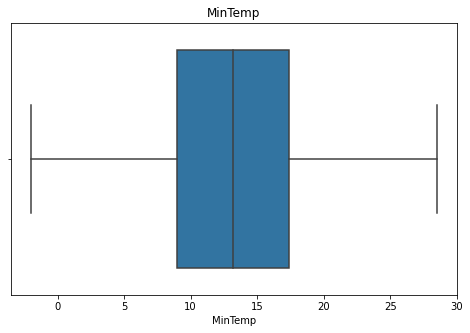

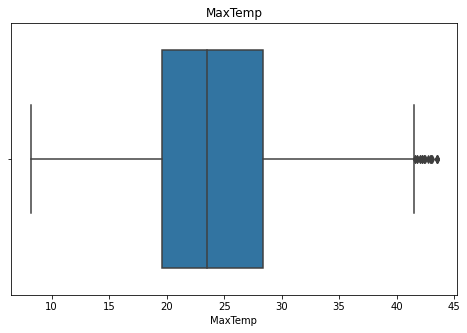

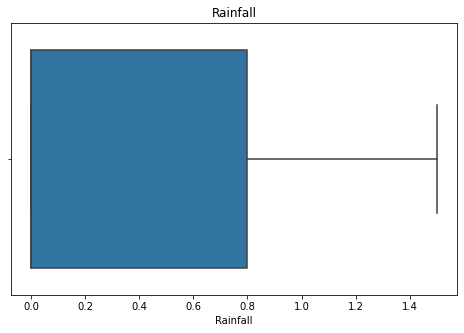

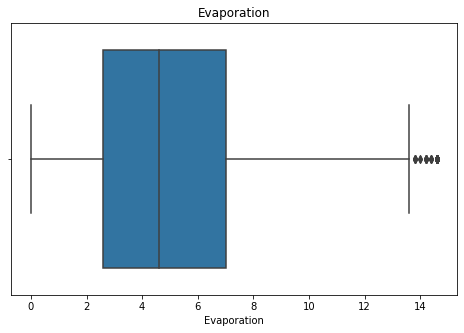

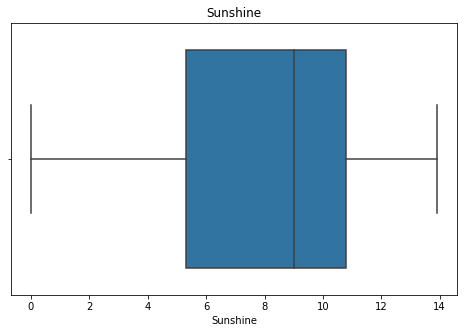

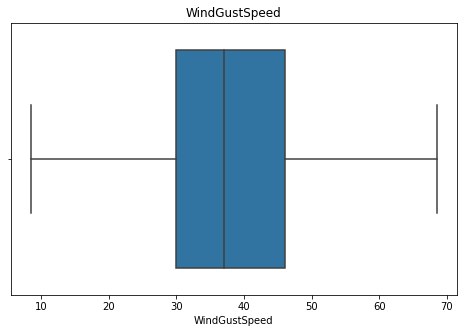

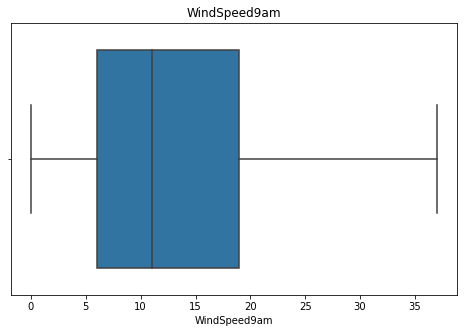

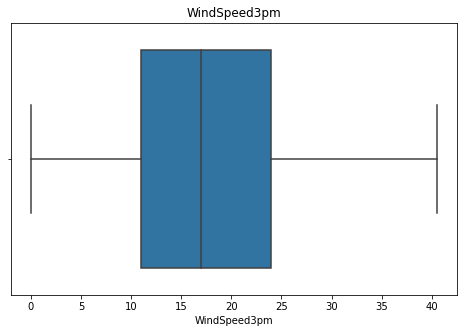

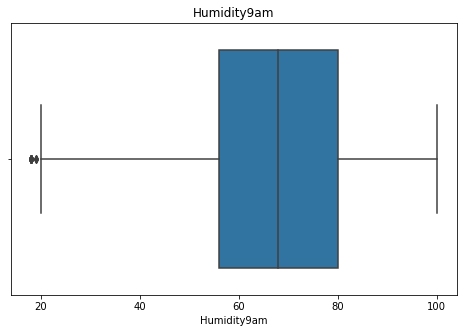

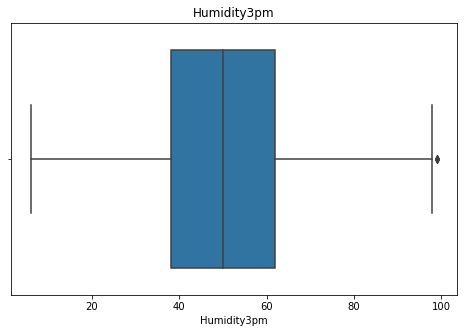

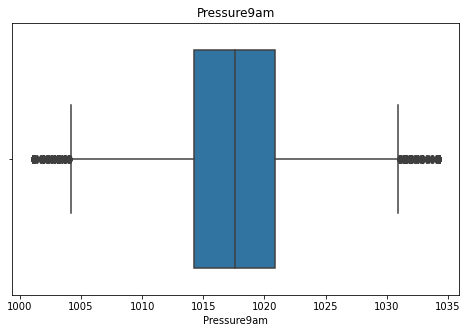

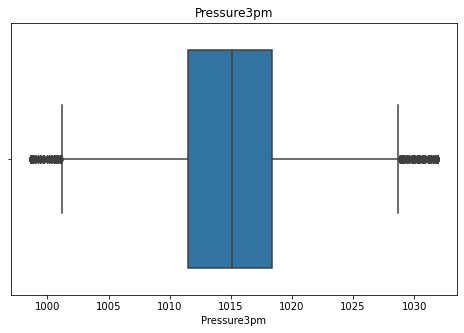

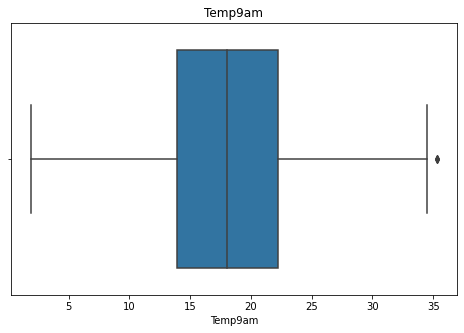

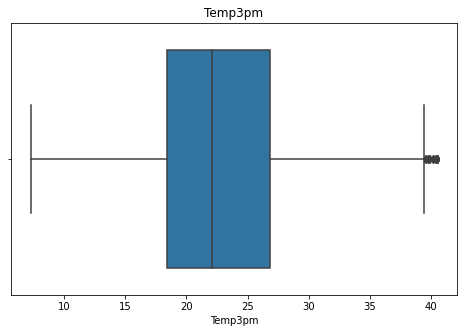

In [257]:
for feature in continuous_feature:
    data=df.copy()
    plt.figure(figsize=(8,5))
    sns.boxplot(data[feature])
    plt.title(feature)
    

### Explore Numerical Variables 

In [258]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 25 numerical variables

The numerical variables are : ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Date_month', 'Date_day']


In [259]:
# view the numerical variables

df[numerical].head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01         1     13.4     22.9       0.6          4.2       3.8   
1 2008-12-02         1      7.4     25.1       0.0          8.0       9.9   
2 2008-12-03         1     12.9     25.7       0.0          2.0       5.8   
3 2008-12-04         1      9.2     28.0       0.0          2.8      10.1   
4 2008-12-05         1     17.5     32.3       1.0          1.2       9.5   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Pressure9am  Pressure3pm  \
0          4.0           44.0         5.0  ...       1007.7       1007.1   
1          2.0           44.0         0.0  ...       1010.6       1007.8   
2          5.0           46.0         5.0  ...       1007.6       1008.7   
3         11.0           24.0        13.0  ...       1017.6       1012.8   
4          4.0           41.0        12.0  ...       1010.8       1006.0   

   Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Date_month  \
0       8.0       7.0     16.9     21.8          0             0          12   
1       4.0       1.0     17.2     24.3          0             0          12   
2       8.0       2.0     21.0     23.2          0             0          12   
3       0.0       2.0     18.1     26.5          0             0          12   
4       7.0       8.0     17.8     29.7          0             0          12   

   Date_day  
0         1  
1         2  
2         3  
3         4  
4         5  

[5 rows x 25 columns]

### Summary of numerical variables


- There are 19 numerical variables. 


- These are given by `MinTemp`, `MaxTemp`, `Rainfall`, `Evaporation`, `Sunshine`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am` and `Temp3pm`.


- All of the numerical variables are of continuous type.

Next, we will check if the dataset is Imbalanced or balanced. If the data set is unbalanced, we need to either downsample the majority or oversample the minority to balance it.

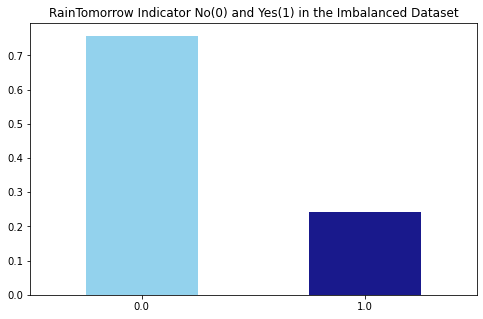

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

We can observe that the presence of “0” and “1” is almost in the 78:22 ratio. So there is a class imbalance and we have to deal with it. To fight against the class imbalance, we will use here the oversampling of the minority class. Since the size of the dataset is quite small, majority class subsampling wouldn’t make much sense here.

# PreProcessing Pipeline

## Handling Class Imbalance For Rainfall Prediction

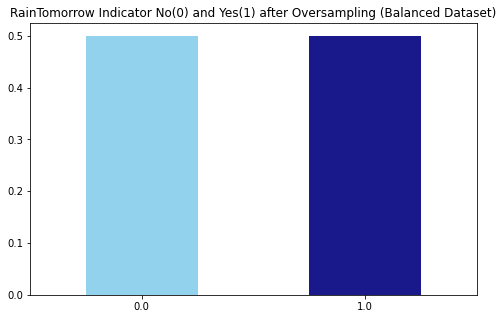

In [11]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

### Now, I will now check the missing data model in the dataset:

## Imputation and Transformation
We will impute the categorical columns with mode, and then we will use the label encoder to convert them to numeric numbers. Once all the columns in the full data frame are converted to numeric columns, we will impute the missing values ​​using the Multiple Imputation by Chained Equations (MICE) package.

Then we will detect outliers using the interquartile range and remove them to get the final working dataset. Finally, we will check the correlation between the different variables, and if we find a pair of highly correlated variables, we will discard one while keeping the other.

In [15]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [16]:
# Impute categorical var with Mode
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [18]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

## Outliers Detection

In [77]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count   6692.0   6705.0    6624.0       3841.0    3526.0         5820.0   
mean      13.0     24.0       3.0          5.0       8.0           39.0   
std        6.0      6.0      11.0          4.0       4.0           14.0   
min       -2.0      8.0       0.0          0.0       0.0            7.0   
25%        9.0     20.0       0.0          3.0       5.0           30.0   
50%       13.0     24.0       0.0          5.0       9.0           37.0   
75%       18.0     28.0       1.0          7.0      11.0           48.0   
max       28.0     46.0     371.0        145.0      14.0          107.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count        6699.0        6662.0       6708.0       6666.0       5454.0   
mean           13.0          18.0         68.0         50.0       1018.0   
std            10.0          10.0         17.0         19.0          7.0   
min             0.0 

Text(0, 0.5, 'WindSpeed3pm')

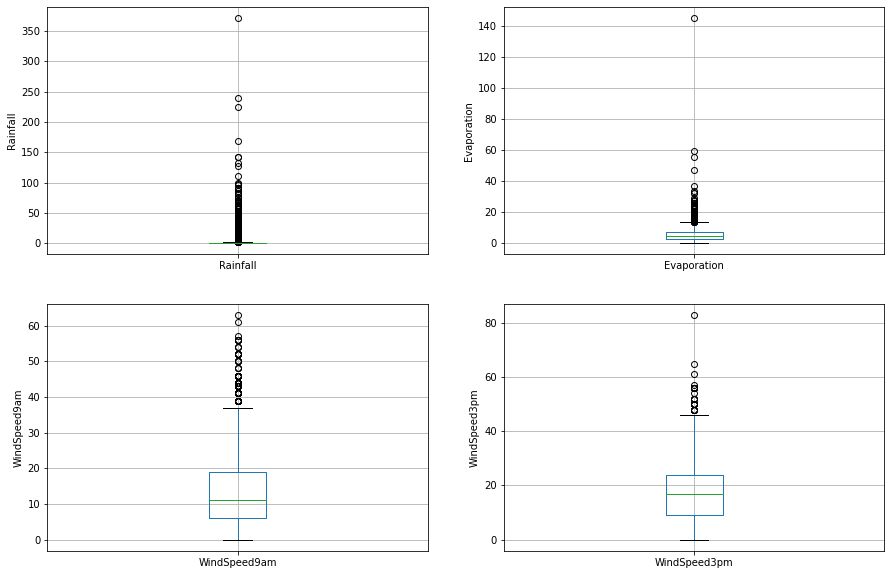

In [78]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

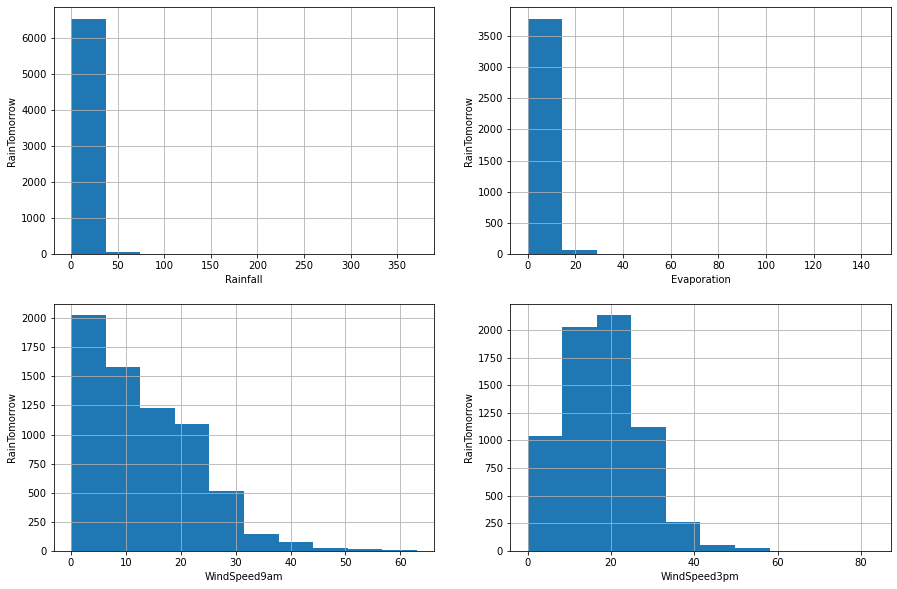

In [79]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

We observe that the original dataset had the form (87927, 24). After running a code snippet for removing outliers, the dataset now has the form (86065, 24). As a result, the dataset is now free of 1862 outliers. We are now going to check multicollinearity, that is to say if a character is strongly correlated with another.

<AxesSubplot:>

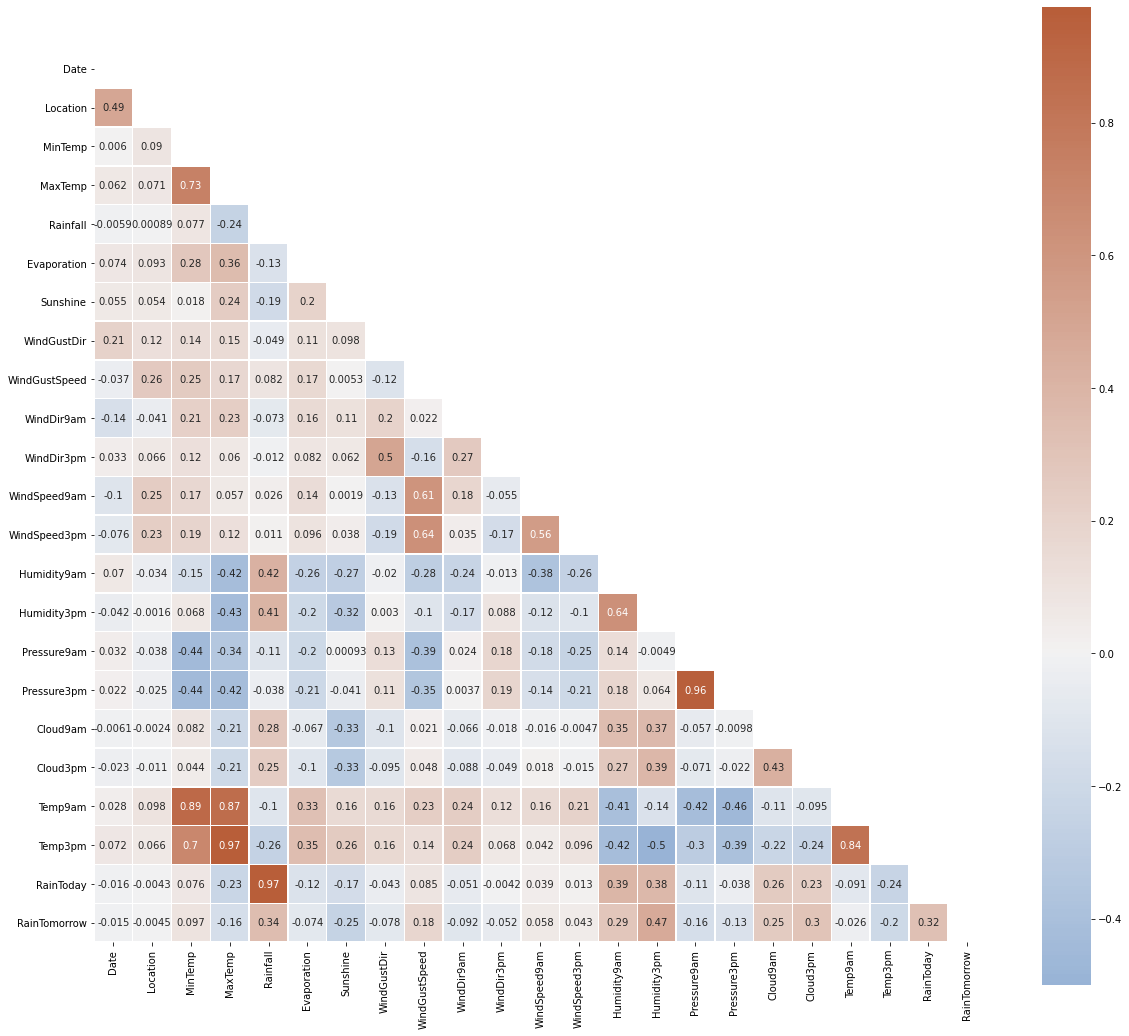

In [157]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

### Observation:-

- `RainToday` and `Rainfall` variables are highly positively correlated (correlation coefficient = 0.83).

- `MinTemp` and `MaxTemp` variables are highly positively correlated (correlation coefficient = 0.74).

- `MinTemp` and `Temp3pm` variables are also highly positively correlated (correlation coefficient = 0.71).

- `MinTemp` and `Temp9am` variables are strongly positively correlated (correlation coefficient = 0.90).

- `MaxTemp` and `Temp9am` variables are strongly positively correlated (correlation coefficient = 0.89).

- `MaxTemp` and `Temp3pm` variables are also strongly positively correlated (correlation coefficient = 0.98).

- `WindGustSpeed` and `WindSpeed3pm` variables are highly positively correlated (correlation coefficient = 0.69).

- `Pressure9am` and `Pressure3pm` variables are strongly positively correlated (correlation coefficient = 0.96).

- `Temp9am` and `Temp3pm` variables are strongly positively correlated (correlation coefficient = 0.86).

However, we can delve deeper into the pairwise correlation between these highly correlated characteristics by examining the following pair diagram. Each of the paired plots shows very clearly distinct clusters of RainTomorrow’s “yes” and “no” clusters. There is very minimal overlap between them.

# EDA Concluding Remarks:--
* > Dataset has two data types: float64, object, Except for the Date, Location columns, every column has missing values.
* > Date column has high cardinality which poses several problems to the model in terms of efficiency and also dimensions of data increase when encoded to numerical data.
* >  Target variable is imbalanced. It has more ‘No’ values. If data is imbalanced, then it might decrease the performance of the model. As this data is released by the meteorological department of Australia, it doesn’t make any sense when we try to balance the target variable, because the truthfulness of data might decrease. So, let me keep it as it is.
* > Sunshine feature is inversely proportional to the Rainfall feature.
* > The correlation matrix depicts that the features - MaxTemp, Pressure9am, Pressure3pm, Temp3pm and Temp9am are negatively correlated with target variable. Hence, we can drop this features in our feature selection step later.


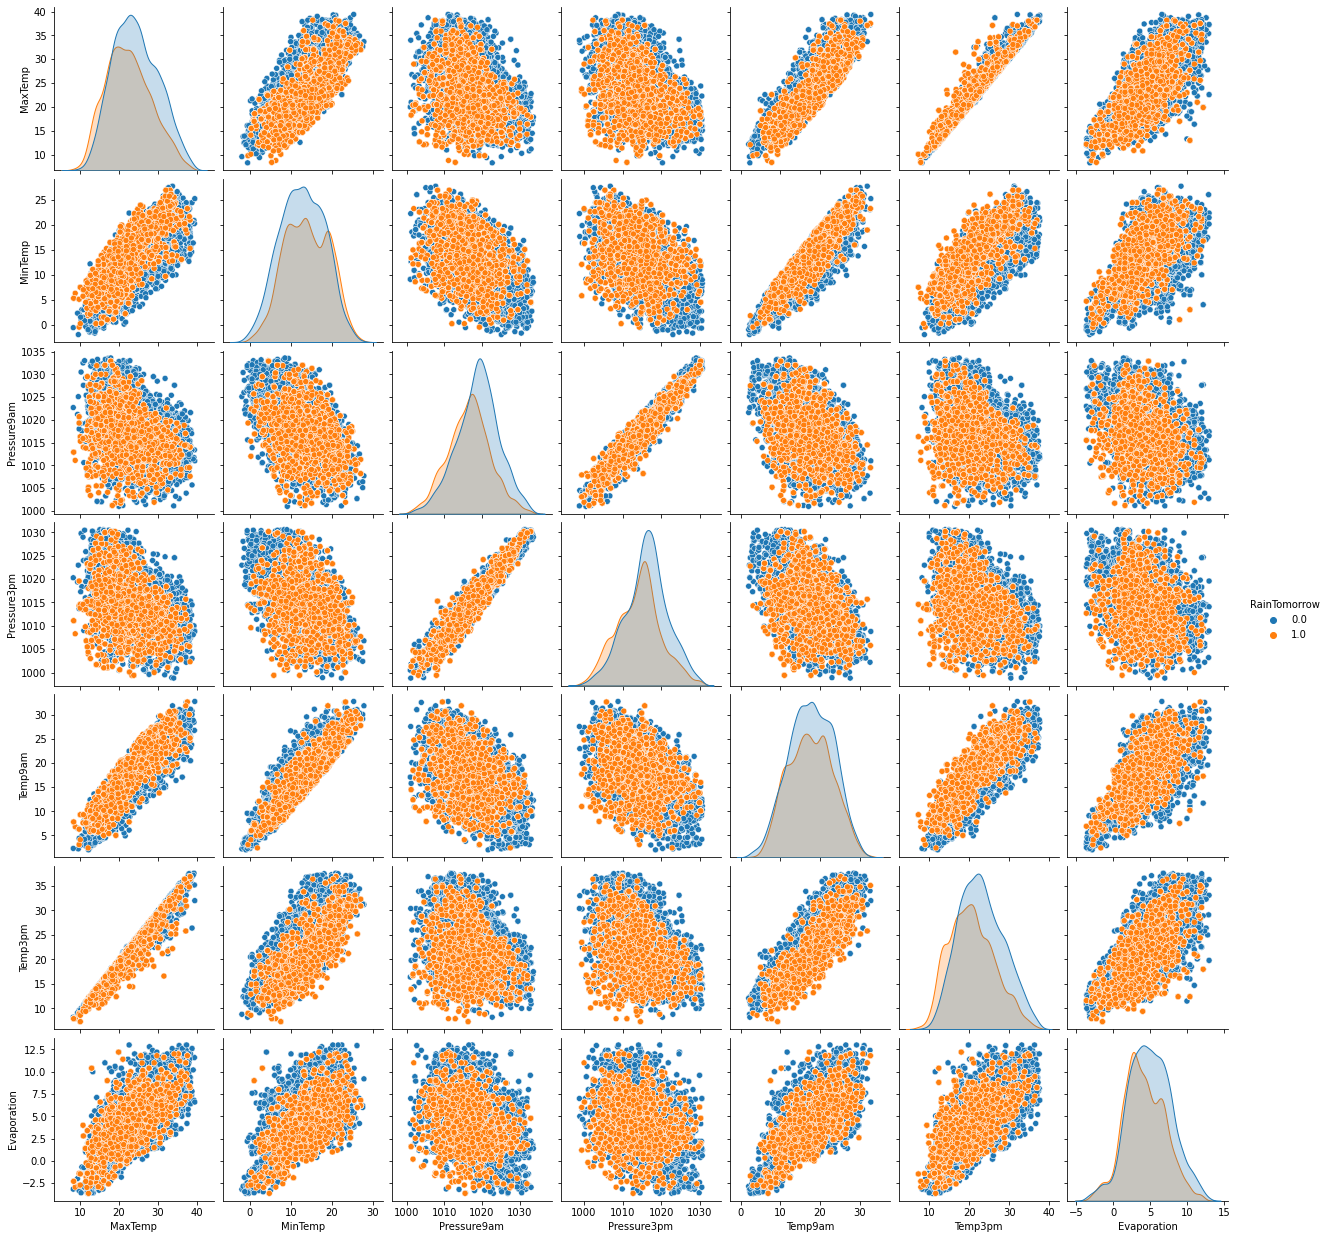

In [22]:
sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation','RainTomorrow'), hue='' )


# Preprocessing Pipeline

## Feature Selection

In [23]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(df)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [24]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday'],
      dtype='object')


### Selection of features by wrapping method (random forest):

In [25]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Date', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud3pm']
[0.04552285 0.02167373 0.03696247 0.03299921 0.02891997 0.0351255
 0.1177546  0.02179026 0.05071181 0.02497631 0.0259351  0.02587539
 0.02833827 0.04441683 0.11580411 0.04671925 0.05793059 0.04206377
 0.10439172 0.03533102 0.03867535 0.0180819 ]


# Building Machine Learning Model

In [26]:
features = df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = df['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [27]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [28]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.7825194911776775
ROC Area under Curve = 0.7770931872873621
Cohen's Kappa = 0.5578440649001561
Time taken = 0.06776928901672363
              precision    recall  f1-score   support

         0.0    0.78506   0.83196   0.80783      1339
         1.0    0.77898   0.72222   0.74953      1098

    accuracy                        0.78252      2437
   macro avg    0.78202   0.77709   0.77868      2437
weighted avg    0.78232   0.78252   0.78156      2437



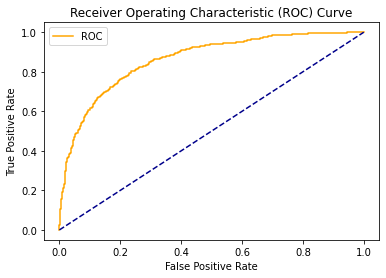

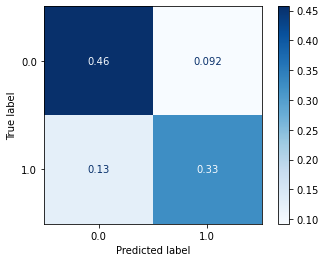

In [29]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)



Accuracy = 0.9043906442347148
ROC Area under Curve = 0.9057822560130375
Cohen's Kappa = 0.8077907210154016
Time taken = 0.018937349319458008
              precision    recall  f1-score   support

         0.0    0.93136   0.89171   0.91110      1339
         1.0    0.87446   0.91985   0.89658      1098

    accuracy                        0.90439      2437
   macro avg    0.90291   0.90578   0.90384      2437
weighted avg    0.90572   0.90439   0.90456      2437



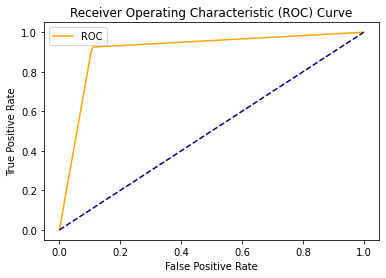

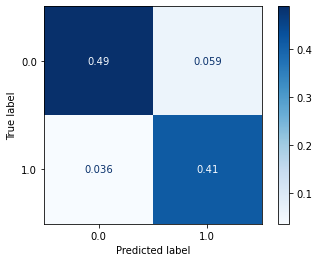

In [30]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)



Accuracy = 0.9626590069757899
ROC Area under Curve = 0.9633966843102607
Cohen's Kappa = 0.9247469672892423
Time taken = 0.8665227890014648
              precision    recall  f1-score   support

         0.0    0.97561   0.95594   0.96567      1339
         1.0    0.94756   0.97086   0.95906      1098

    accuracy                        0.96266      2437
   macro avg    0.96158   0.96340   0.96237      2437
weighted avg    0.96297   0.96266   0.96270      2437



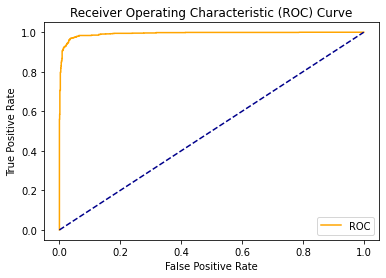

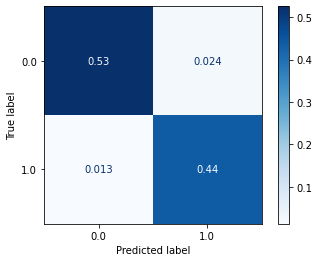

In [31]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)



Accuracy = 0.9495281083299139
ROC Area under Curve = 0.9504639435404993
Cohen's Kappa = 0.8983508648540682
Time taken = 0.28139829635620117
              precision    recall  f1-score   support

         0.0    0.96626   0.94100   0.95346      1339
         1.0    0.93027   0.95993   0.94487      1098

    accuracy                        0.94953      2437
   macro avg    0.94827   0.95046   0.94916      2437
weighted avg    0.95004   0.94953   0.94959      2437



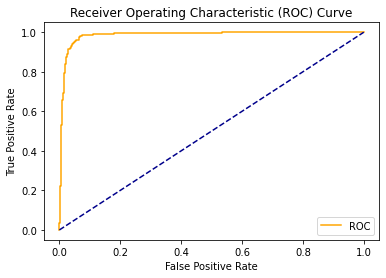

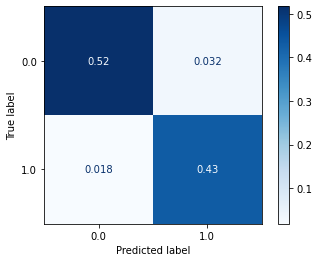

In [34]:
# Light GBM
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)



Accuracy = 0.9610176446450553
ROC Area under Curve = 0.961821071919751
Cohen's Kappa = 0.9214519889001718
Time taken = 141.69639229774475
              precision    recall  f1-score   support

         0.0    0.97481   0.95370   0.96414      1339
         1.0    0.94499   0.96995   0.95730      1098

    accuracy                        0.96102      2437
   macro avg    0.95990   0.96182   0.96072      2437
weighted avg    0.96137   0.96102   0.96106      2437



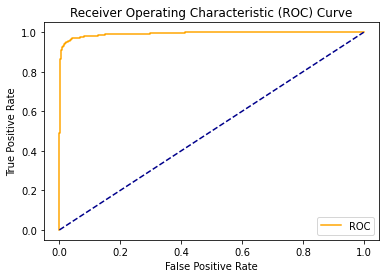

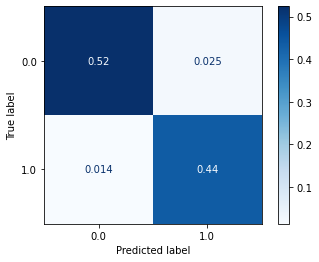

In [35]:
# Catboost
!pip install catboost
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)



[18:08:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.9573245794009028
ROC Area under Curve = 0.9579685924982757
Cohen's Kappa = 0.9139895001544095
Time taken = 2.181858777999878
              precision    recall  f1-score   support

         0.0    0.97030   0.95146   0.96078      1339
         1.0    0.94217   0.96448   0.95320      1098

    accuracy                        0.95732      2437
   macro avg    0.95623   0.95797   0.95699      2437
weighted avg    0.95762   0.95732   0.95737      2437



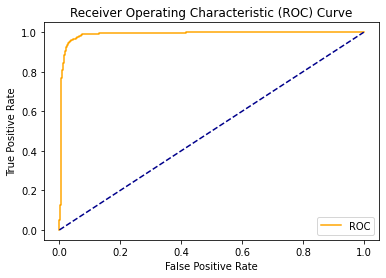

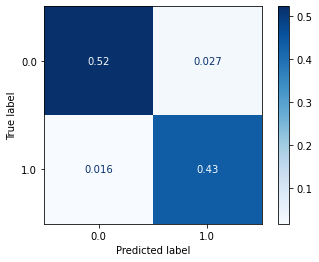

In [36]:
# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

## Plotting Decision Region for all Models

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[18:09:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[18:09:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


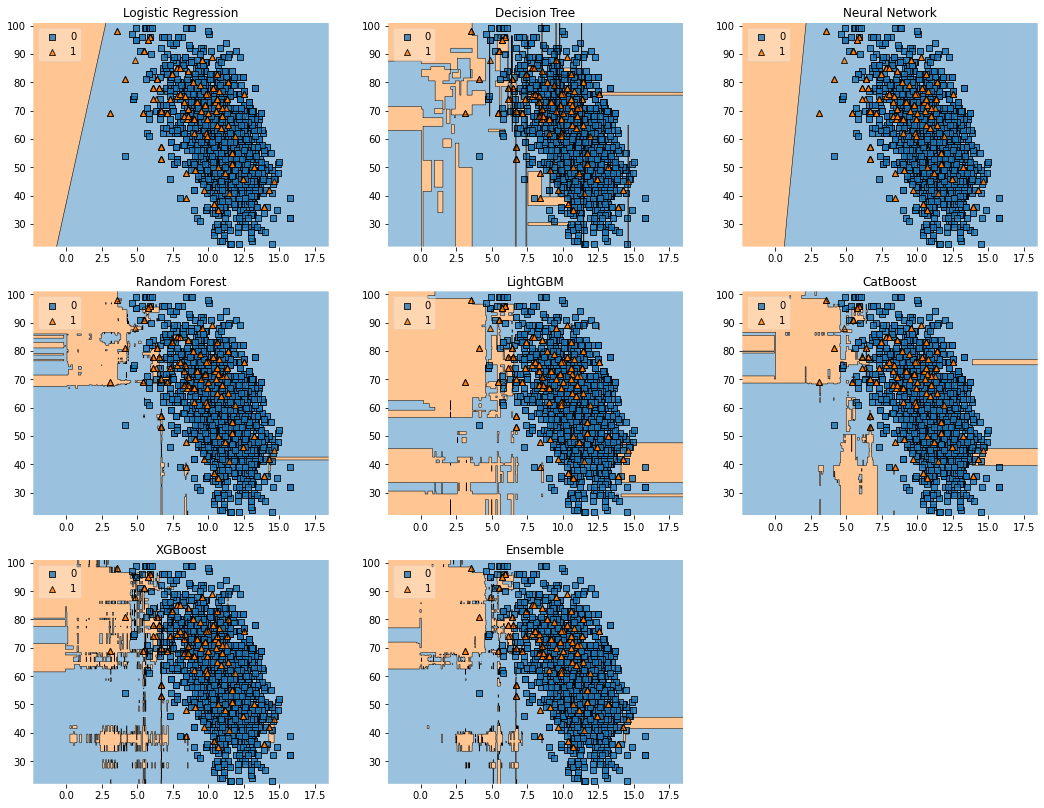

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

value = 1.80
width = 0.90

clf1 = LogisticRegression(random_state=12345)
clf2 = DecisionTreeClassifier(random_state=12345) 
clf3 = MLPClassifier(random_state=12345, verbose = 0)
clf4 = RandomForestClassifier(random_state=12345)
clf5 = lgb.LGBMClassifier(random_state=12345, verbose = 0)
clf6 = cb.CatBoostClassifier(random_state=12345, verbose = 0)
clf7 = xgb.XGBClassifier(random_state=12345)
eclf = EnsembleVoteClassifier(clfs=[clf4, clf5, clf6, clf7], weights=[1, 1, 1, 1], voting='soft')

X_list = MiceImputed[["Sunshine", "Humidity9am", "Cloud3pm"]] #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = MiceImputed["RainTomorrow"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression',
          'Decision Tree',
          'Neural Network',
          'Random Forest',
          'LightGBM',
          'CatBoost',
          'XGBoost',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, eclf],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value}, 
                                filler_feature_ranges={2: width}, 
                                legend=2)
    plt.title(lab)

plt.show()

## Rainfall Prediction Model Comparison

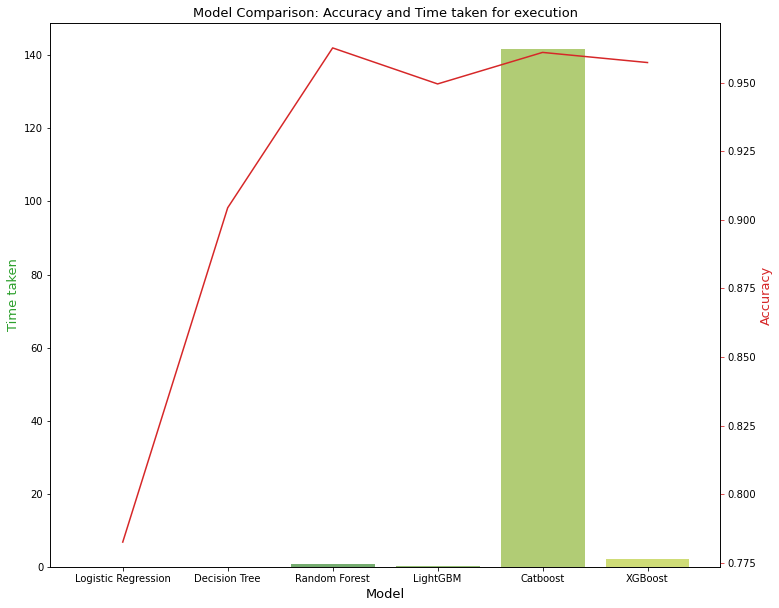

In [40]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_rf, coh_kap_lgb, coh_kap_cb, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_rf, tt_lgb, tt_cb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','LightGBM','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

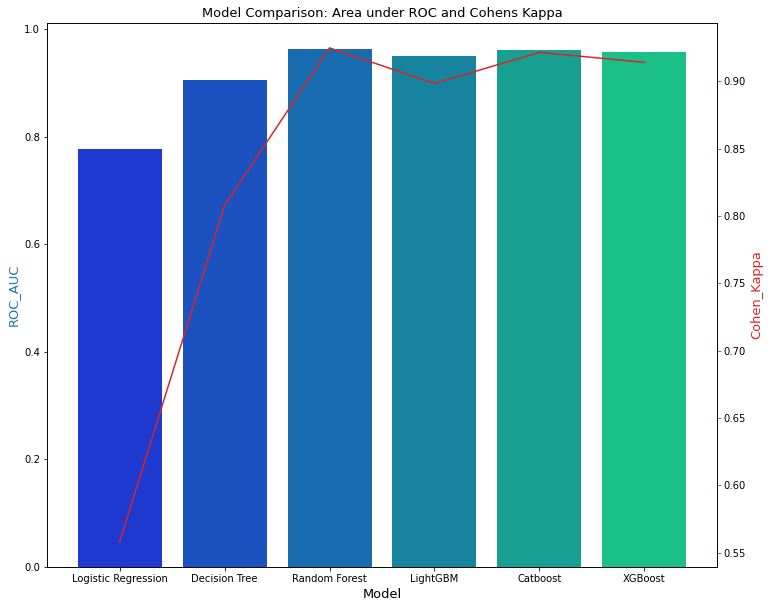

In [41]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

### We can observe that XGBoost, CatBoost and Random Forest performed better compared to other models. However, if speed is an important thing to consider, we can stick with Random Forest instead of XGBoost or CatBoost.

# Hyper Parameter Tuning with RandomForest

In [42]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [43]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [45]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = clf4, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [46]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [47]:
# looking at best parameters
rf_random.best_params_


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [48]:
prediction = rf_random.predict(X_test)

Accuracy = 0.9626590069757899
ROC Area under Curve = 0.9633966843102607
Cohen's Kappa = 0.9247469672892423
Time taken = 0.8596584796905518
              precision    recall  f1-score   support

         0.0    0.97561   0.95594   0.96567      1339
         1.0    0.94756   0.97086   0.95906      1098

    accuracy                        0.96266      2437
   macro avg    0.96158   0.96340   0.96237      2437
weighted avg    0.96297   0.96266   0.96270      2437



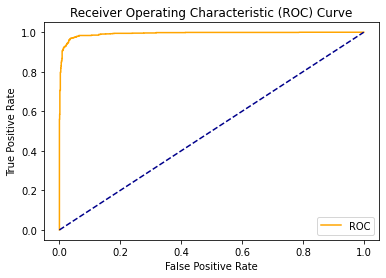

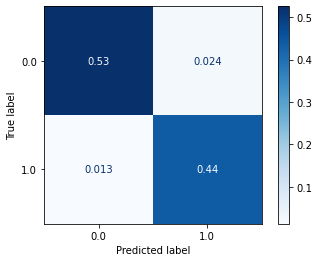

In [52]:
rf_random, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(rf_random, X_train, y_train, X_test, y_test)

RandomForestClassifier Performance
---------------------------------------------------
Accuracy Score 0.9671727533853098
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1339
         1.0       0.95      0.98      0.96      1098

    accuracy                           0.97      2437
   macro avg       0.97      0.97      0.97      2437
weighted avg       0.97      0.97      0.97      2437



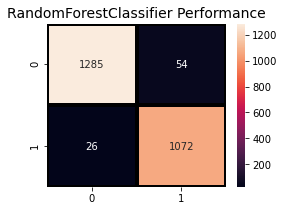

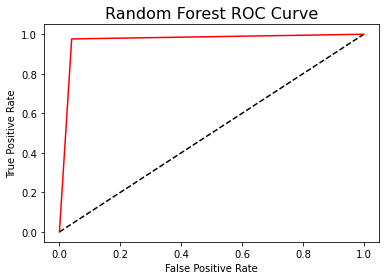

In [53]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
print('RandomForestClassifier Performance')
print('---------------------------------------------------')
print('Accuracy Score', accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RandomForestClassifier Performance",fontsize=14)
plt.show()

fpr_rf, tpr_rf, thresholds = roc_curve(y_test,prediction)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

#### If we observe the above metrics, We got good values with hyperparameter tuning model compare to model without hyper parameter tuning with Random Forest Classifier, Increased accuracy by 1 %

# Save The Model

In [54]:
import joblib
joblib.dump(rf_random,'RandomForestClassifier.obj')


['RandomForestClassifier.obj']

# Load The Model

In [55]:
loadmodel = joblib.load('RandomForestClassifier.obj')

In [56]:
import numpy as np
a = np.array(y_test)
pred = np.array(rf_random.predict(X_test))
df_final = pd.DataFrame({"Original":a,"Predicted":pred},index=range(len(a)))
df_final

Original  Predicted
0          0.0        1.0
1          0.0        0.0
2          1.0        1.0
3          1.0        1.0
4          1.0        1.0
...        ...        ...
2432       0.0        0.0
2433       1.0        1.0
2434       0.0        0.0
2435       0.0        1.0
2436       0.0        0.0

[2437 rows x 2 columns]

### The above dataframe have original data with the predicted data from the best model.
## Super excited to proceed with the 2nd model!
### Rain Rain Go Away, Come Again, Another Day!!!

![rain](https://mir-s3-cdn-cf.behance.net/project_modules/max_1200/15fbcc74510513.5c327cd3e9c68.gif)

# Let's make our the 2nd model to predict how much rainfall could be there in Australia

## We have already imported neccessary libraries, loaded the dataset let's go ahead and explore our dataset with the new target variable "Rainfall". 
#### We will not repeat the same EDA steps


# Import libraries

In [377]:
import numpy as np 
import pandas as pd 
import warnings

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore')

# Import dataset

In [378]:
df = pd.read_csv("weatherAUS.csv")

# Exploratory Data Analysis

In [379]:
# Preview the dataset
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [380]:
# create a table with data missing 
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing , 
     'data type' : df.dtypes
}
frame=pd.DataFrame(value)
frame


missing_values   percent_missing % data type
Date                         0           0.000000    object
Location                     0           0.000000    object
MinTemp                     75           0.890208   float64
MaxTemp                     60           0.712166   float64
Rainfall                   240           2.848665   float64
Evaporation               3512          41.685460   float64
Sunshine                  3994          47.406528   float64
WindGustDir                991          11.762611    object
WindGustSpeed              991          11.762611   float64
WindDir9am                 829           9.839763    object
WindDir3pm                 308           3.655786    object
WindSpeed9am                76           0.902077   float64
WindSpeed3pm               107           1.270030   float64
Humidity9am                 59           0.700297   float64
Humidity3pm                102           1.210682   float64
Pressure9am               1309          15.537092   float64
Pressure3pm               1312          15.572700   float64
Cloud9am                  2421          28.735905   float64
Cloud3pm                  2455          29.139466   float64
Temp9am                     56           0.664688   float64
Temp3pm                     96           1.139466   float64
RainToday                  240           2.848665    object
RainTomorrow               239           2.836795    object

<AxesSubplot:>

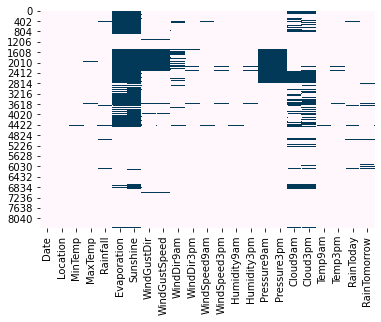

In [381]:
# Missing Data Pattern in Training Data
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

#### Obviously, “Evaporation”, “Sunshine”, “Cloud9am”, “Cloud3pm” are the features with a high missing percentage. So we will check the details of the missing data for these 4 features.

In [382]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

Total   Percent
Sunshine      3994  0.474065
Evaporation   3512  0.416855
Cloud3pm      2455  0.291395
Cloud9am      2421  0.287359

* > We observe that the 4 features have less than 50 per cent missing data. So instead of rejecting them completely, we’ll consider them in our model with proper imputation.

In [383]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [384]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [385]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample
    
    
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

In [386]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          3.0      13.8   
1     2008-12-02   Albury      7.4     25.1       0.0          2.2       7.6   
2     2008-12-03   Albury     12.9     25.7       0.0          4.6       7.7   
3     2008-12-04   Albury      9.2     28.0       0.0          1.8       8.0   
4     2008-12-05   Albury     17.5     32.3       1.0          3.8      11.9   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          6.4       1.2   
8421  2017-06-22    Uluru      3.6     25.3       0.0         12.6       7.1   
8422  2017-06-23    Uluru      5.4     26.9       0.0          4.2      13.0   
8423  2017-06-24    Uluru      7.8     27.0       0.0          4.0      13.1   
8424  2017-06-25    Uluru     14.9      NaN       0.0          8.4       4.4   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       8.0     16.9     21.8   
1          1010.6       1007.8       1.0       4.0     17.2     24.3   
2          1007.6       1008.7       2.0       2.0     21.0     23.2   
3          1017.6       1012.8       8.0       7.0     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       8.0       4.0     10.1     22.4   
8421       1023.5       1019.1       1.0       1.0     10.9     24.5   
8422       1021.0       1016.8       6.0       5.0     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

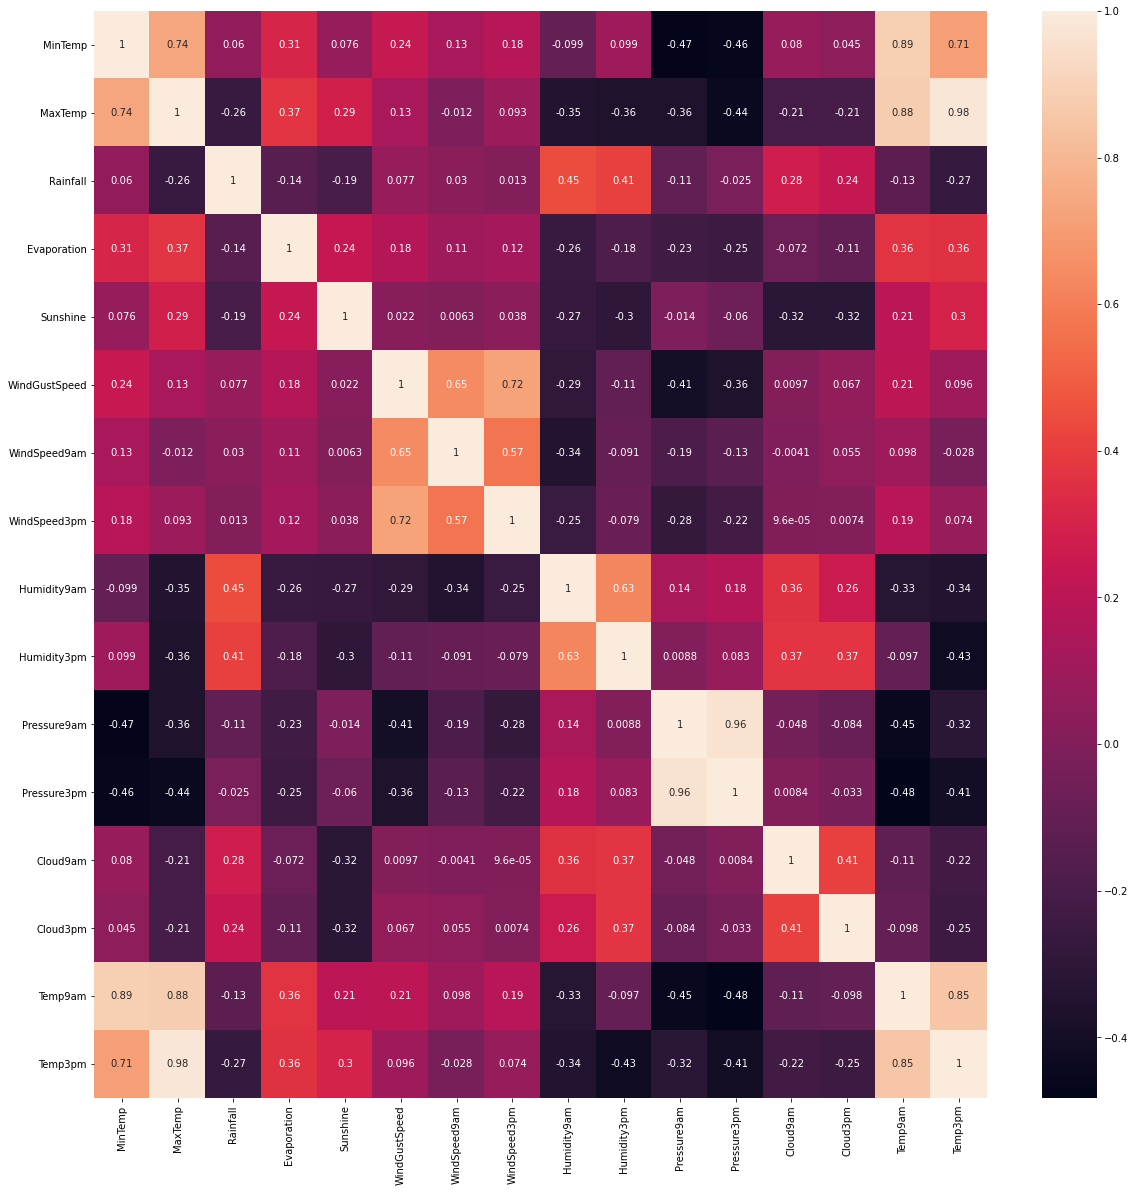

In [387]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [388]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [389]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation       0.000000
Sunshine          0.000000
WindGustDir      11.762611
WindGustSpeed     0.000000
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           0.000000
Temp3pm           0.000000
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [390]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
    
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)

df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          3.0      13.8   
1     2008-12-02   Albury      7.4     25.1       0.0          2.2       7.6   
2     2008-12-03   Albury     12.9     25.7       0.0          4.6       7.7   
3     2008-12-04   Albury      9.2     28.0       0.0          1.8       8.0   
4     2008-12-05   Albury     17.5     32.3       1.0          3.8      11.9   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          6.4       1.2   
8421  2017-06-22    Uluru      3.6     25.3       0.0         12.6       7.1   
8422  2017-06-23    Uluru      5.4     26.9       0.0          4.2      13.0   
8423  2017-06-24    Uluru      7.8     27.0       0.0          4.0      13.1   
8424  2017-06-25    Uluru     14.9     23.3       0.0          8.4       4.4   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN           39.0        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       8.0     16.9     21.8   
1          1010.6       1007.8       1.0       4.0     17.2     24.3   
2          1007.6       1008.7       2.0       2.0     21.0     23.2   
3          1017.6       1012.8       8.0       7.0     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       8.0       4.0     10.1     22.4   
8421       1023.5       1019.1       1.0       1.0     10.9     24.5   
8422       1021.0       1016.8       6.0       5.0     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  
...         ...           ...  
8420          0             0  
8421          0             0  
8422          0             0  
8423          0             0  
8424          0             0  

[8425 rows x 23 columns]

In [391]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["Rainfall"].mean().sort_values(ascending = False)).index)

Date Index(['2016-01-06', '2015-04-23', '2016-04-18', '2009-11-07', '2016-06-05',
       '2013-11-18', '2016-12-19', '2017-03-31', '2012-03-14', '2015-01-28',
       ...
       '2013-05-01', '2013-04-30', '2013-04-29', '2013-04-28', '2013-04-27',
       '2013-04-26', '2013-04-25', '2013-04-24', '2013-04-23', '2017-06-25'],
      dtype='object', name='Date', length=3004)
Location Index(['CoffsHarbour', 'Williamtown', 'Wollongong', 'Brisbane', 'Newcastle',
       'Darwin', 'Penrith', 'Melbourne', 'Albury', 'PerthAirport', 'Adelaide',
       'Uluru'],
      dtype='object', name='Location')
WindGustDir Index(['S', 'WSW', 'SW', 'ESE', 'SE', 'NW', 'SSW', 'SSE', 'W', 'WNW', 'NE',
       'NNE', 'NNW', 'E', 'ENE', 'N'],
      dtype='object', name='WindGustDir')
WindDir9am Index(['WSW', 'SSW', 'SW', 'S', 'ESE', 'WNW', 'W', 'SE', 'SSE', 'NW', 'E',
       'NE', 'NNE', 'NNW', 'N', 'ENE'],
      dtype='object', name='WindDir9am')
WindDir3pm Index(['SSW', 'S', 'SE', 'W', 'SSE', 'E', 'WSW', 'SW', 'NW'

In [392]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}

df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [393]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [394]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [395]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0    2008-12-01   Albury     13.4     22.9       0.6          3.0      13.8   
1    2008-12-02   Albury      7.4     25.1       0.0          2.2       7.6   
2    2008-12-03   Albury     12.9     25.7       0.0          4.6       7.7   
3    2008-12-04   Albury      9.2     28.0       0.0          1.8       8.0   
4    2008-12-05   Albury     17.5     32.3       1.0          3.8      11.9   
...         ...      ...      ...      ...       ...          ...       ...   
8420 2017-06-21    Uluru      2.8     23.4       0.0          6.4       1.2   
8421 2017-06-22    Uluru      3.6     25.3       0.0         12.6       7.1   
8422 2017-06-23    Uluru      5.4     26.9       0.0          4.2      13.0   
8423 2017-06-24    Uluru      7.8     27.0       0.0          4.0      13.1   
8424 2017-06-25    Uluru     14.9     23.3       0.0          8.4       4.4   

      WindGustDir  WindGustSpeed  WindDir9am  ...  Pressure9am  Pressure3pm  \
0             4.0           44.0         5.0  ...       1007.7       1007.1   
1             2.0           44.0         0.0  ...       1010.6       1007.8   
2             5.0           46.0         5.0  ...       1007.6       1008.7   
3            11.0           24.0        13.0  ...       1017.6       1012.8   
4             4.0           41.0        12.0  ...       1010.8       1006.0   
...           ...            ...         ...  ...          ...          ...   
8420         15.0           31.0        13.0  ...       1024.6       1020.3   
8421          0.0           22.0        13.0  ...       1023.5       1019.1   
8422          3.0           37.0        13.0  ...       1021.0       1016.8   
8423         12.0           28.0        11.0  ...       1019.4       1016.5   
8424          3.0           39.0        14.0  ...       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0          8.0       8.0     16.9     21.8          0             0   
1          1.0       4.0     17.2     24.3          0             0   
2          2.0       2.0     21.0     23.2          0             0   
3          8.0       7.0     18.1     26.5          0             0   
4          7.0       8.0     17.8     29.7          0             0   
...        ...       ...      ...      ...        ...           ...   
8420       8.0       4.0     10.1     22.4          0             0   
8421       1.0       1.0     10.9     24.5          0             0   
8422       6.0       5.0     12.5     26.1          0             0   
8423       3.0       2.0     15.1     26.0          0             0   
8424       8.0       8.0     15.0     20.9          0             0   

      Date_month  Date_day  
0             12         1  
1             12         2  
2             12         3  
3             12         4  
4             12         5  
...          ...       ...  
8420           6        21  
8421           6        22  
8422           6        23  
8423           6        24  
8424           6        25  

[8425 rows x 25 columns]

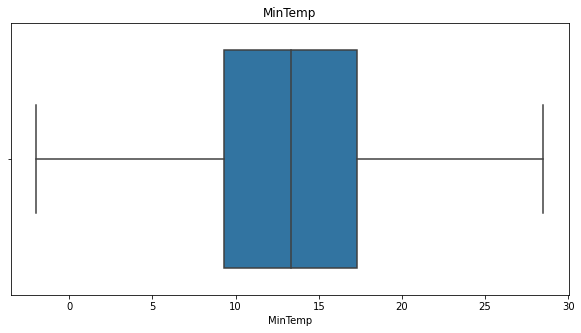

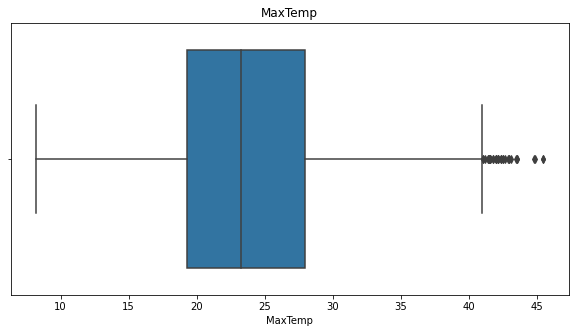

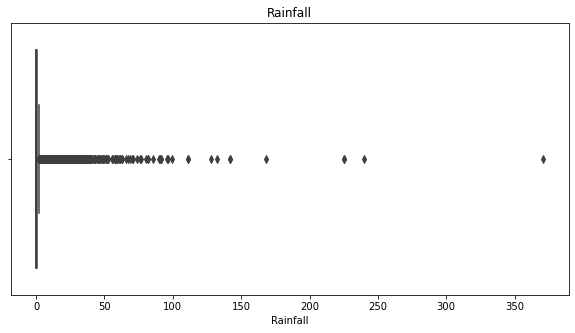

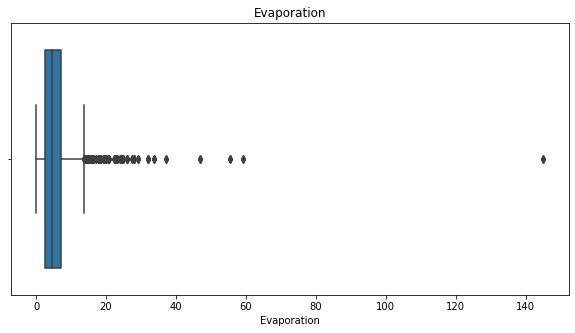

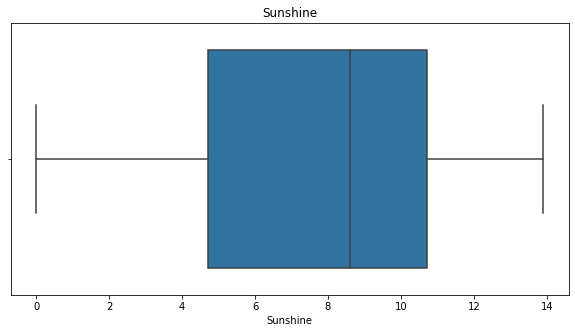

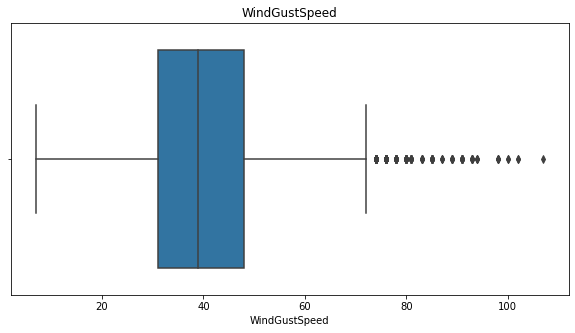

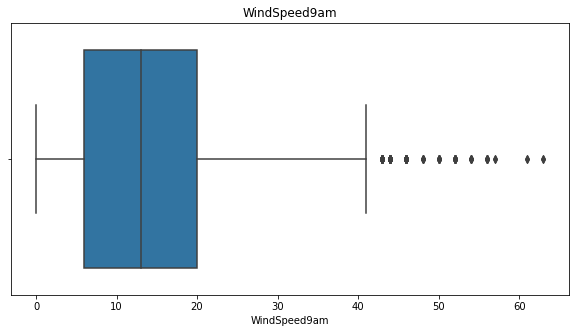

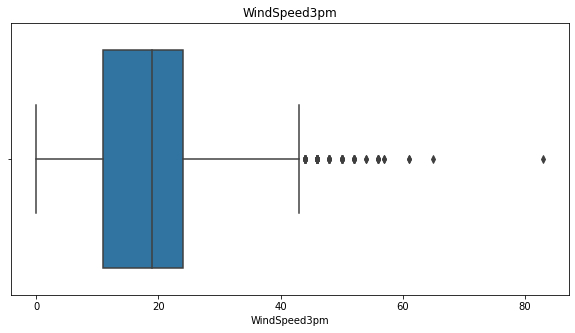

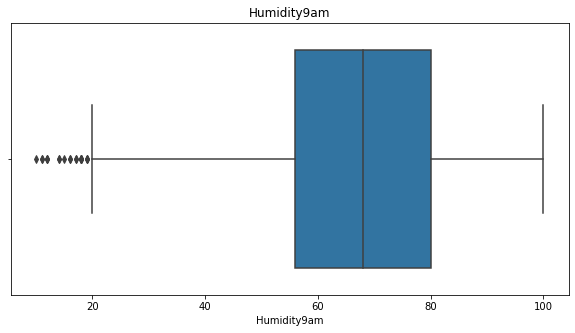

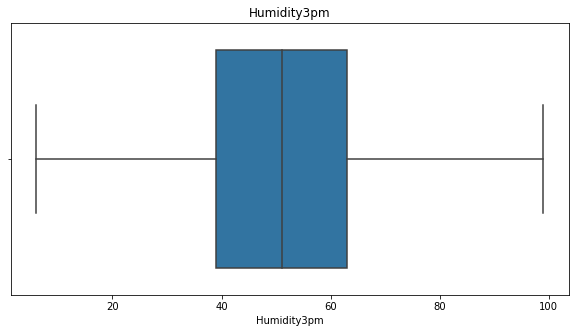

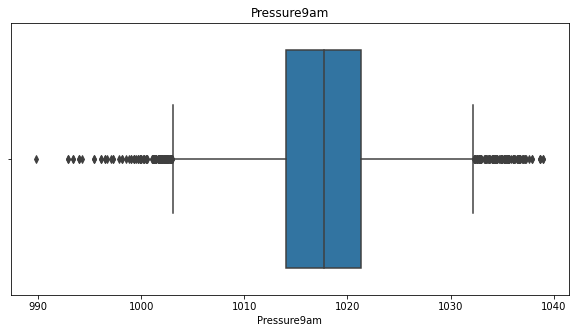

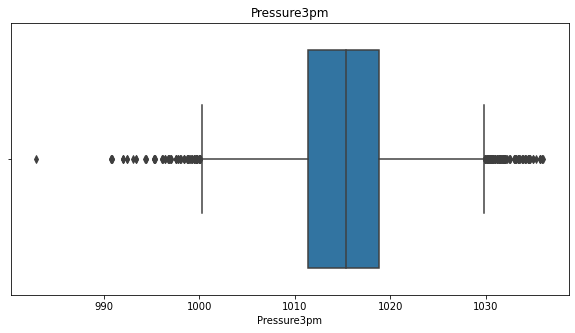

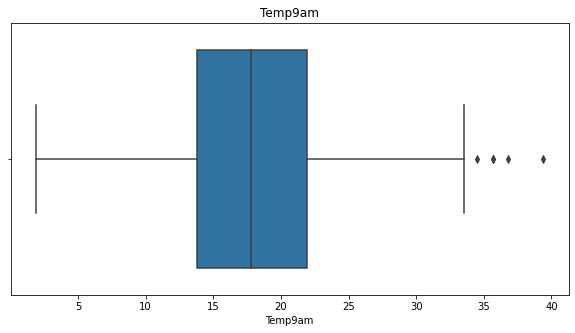

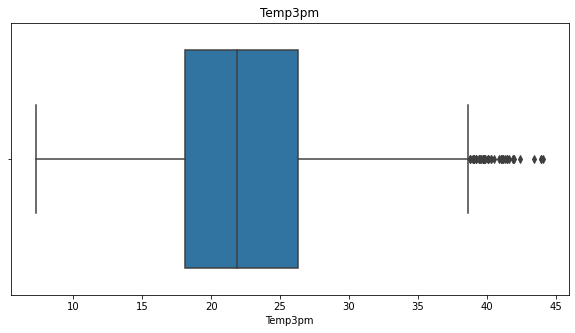

In [396]:
for feature in continuous_feature:
    data=df.copy()
    plt.figure(figsize=(10,5))
    sns.boxplot(data[feature])
    plt.title(feature)
    

In [397]:
for feature in continuous_feature:
    print(feature)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm


## Outlier Removal

In [398]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-2.6999999999999993 29.3


In [399]:
df.loc[df['MinTemp']>=30.45,'MinTemp']=30.45
df.loc[df['MinTemp']<=-5.95,'MinTemp']=-5.95

In [400]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

6.250000000000002 41.05


In [401]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

6.250000000000002 41.05


In [402]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.7,'MaxTemp']=2.7

In [403]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.2000000000000002 2.0


In [404]:
df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

In [405]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.0 13.600000000000001


In [406]:
df.loc[df['Evaporation']>=14.6,'Evaporation']=14.6
df.loc[df['Evaporation']<=-4.6,'Evaporation']=-4.6

In [407]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.5 73.5


In [408]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [409]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-15.0 41.0


In [410]:
df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [411]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-8.5 43.5


In [412]:
df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [413]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

20.0 116.0


In [414]:
df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

In [415]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1003.0500000000001 1032.25


In [416]:
df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05

In [417]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1000.3 1029.8999999999999


In [418]:
df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [419]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.650000000000004 34.05


In [420]:
df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

In [421]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.8000000000000025 38.6


In [422]:
df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.45,'Temp3pm']=2.45

MinTemp


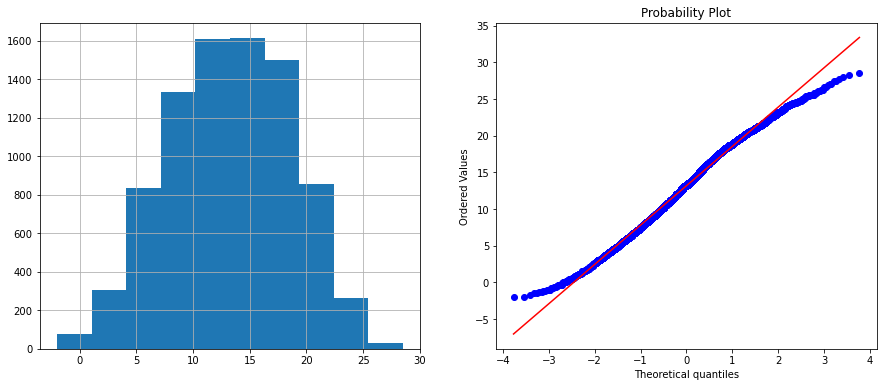

MaxTemp


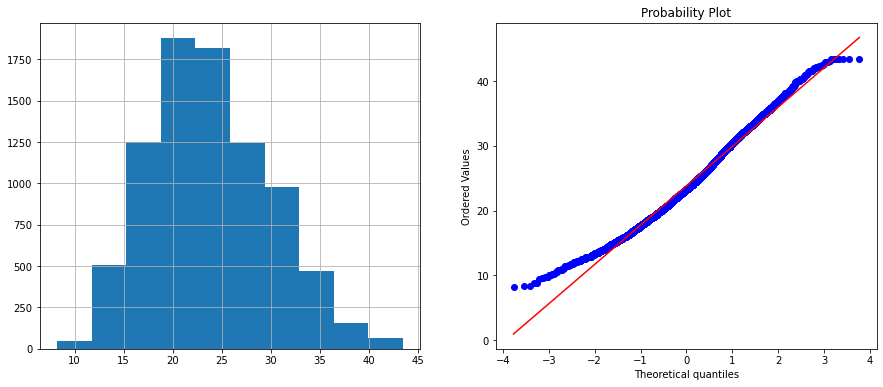

Rainfall


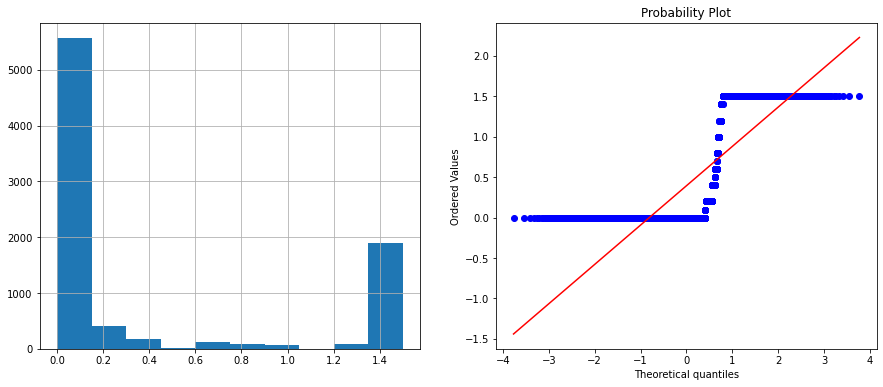

Evaporation


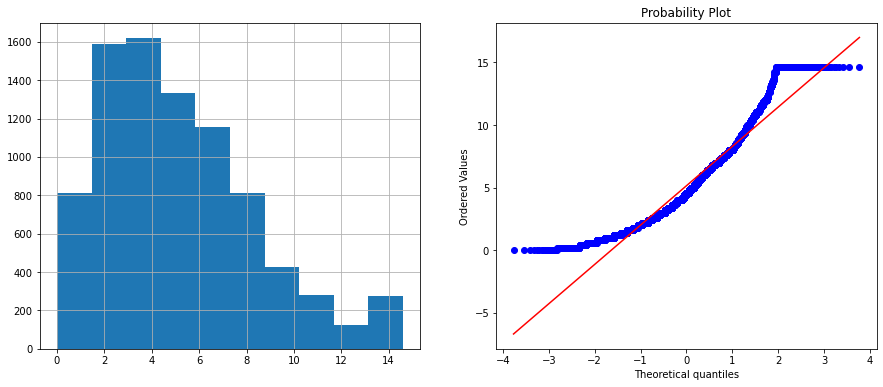

Sunshine


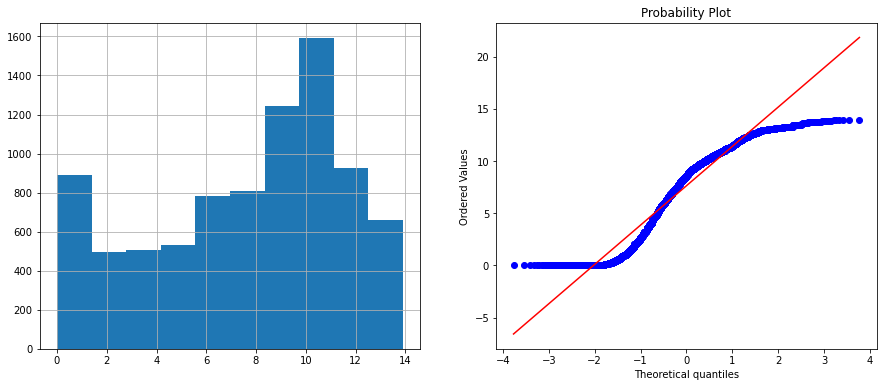

WindGustSpeed


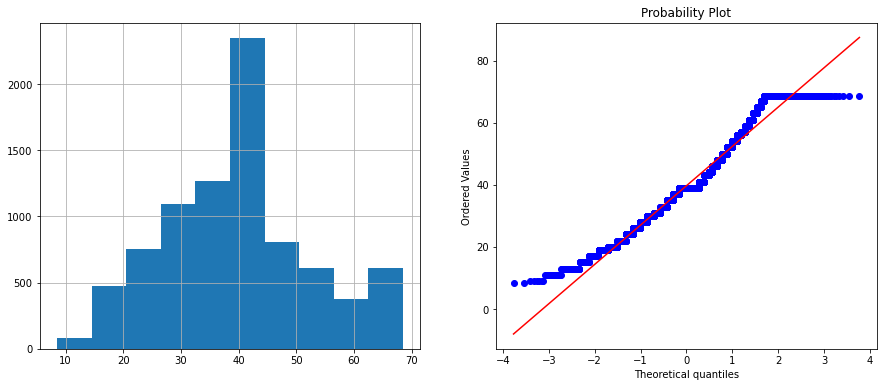

WindSpeed9am


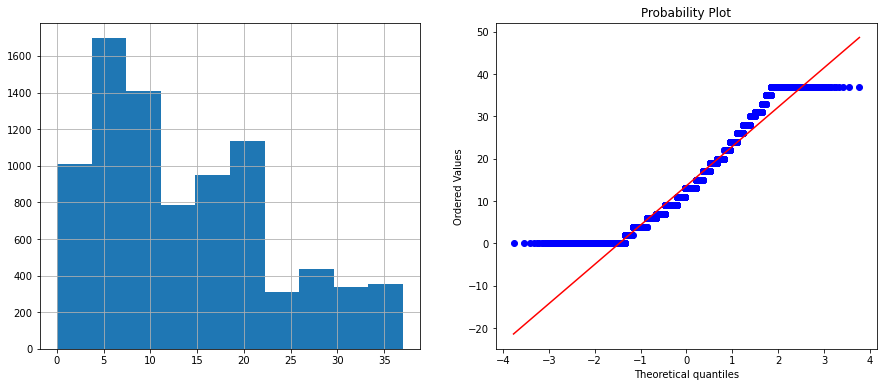

WindSpeed3pm


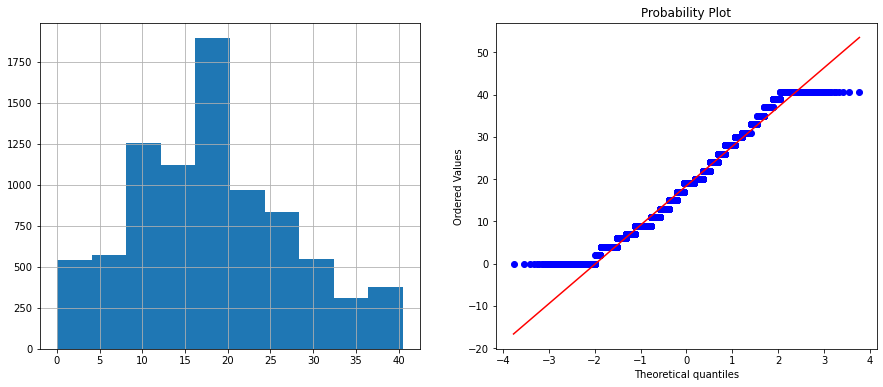

Humidity9am


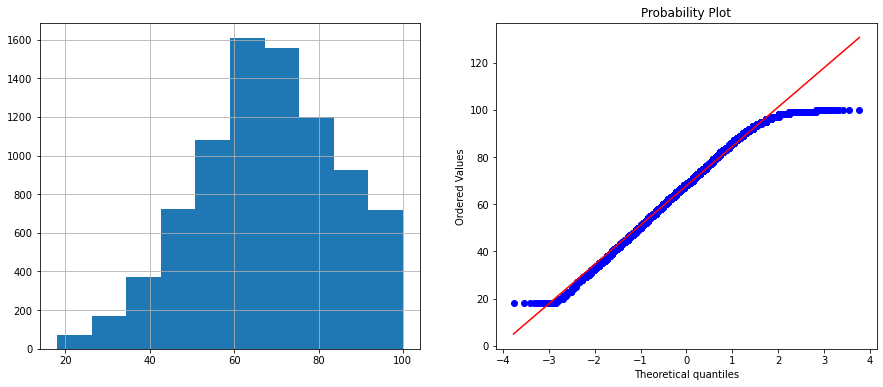

Humidity3pm


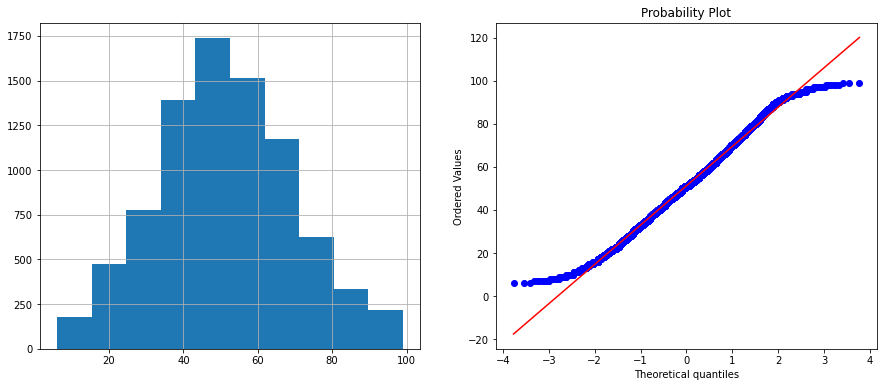

Pressure9am


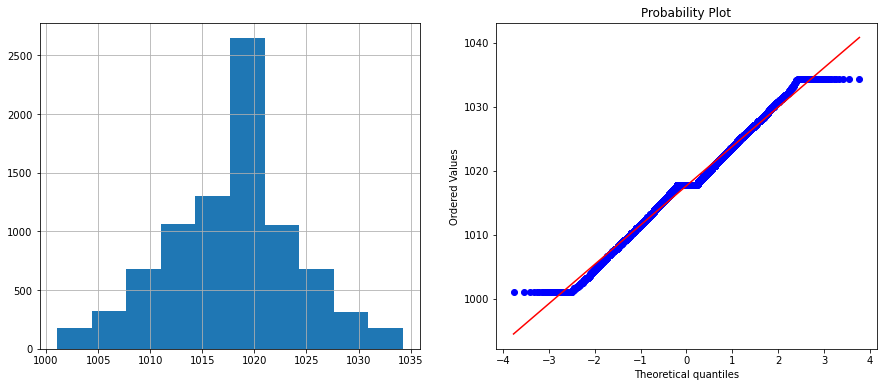

Pressure3pm


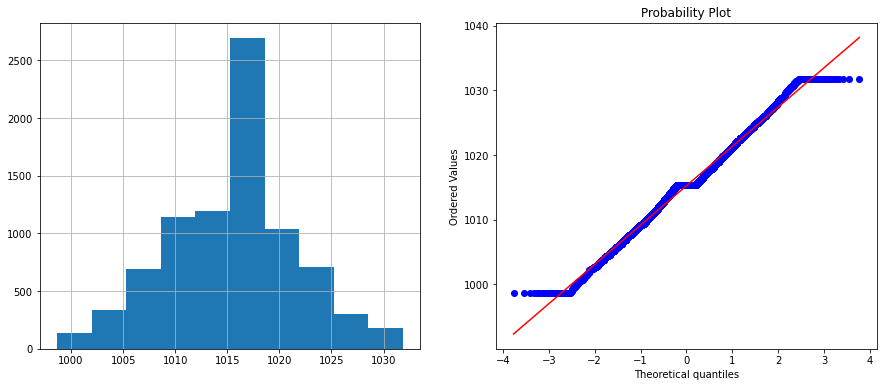

Temp9am


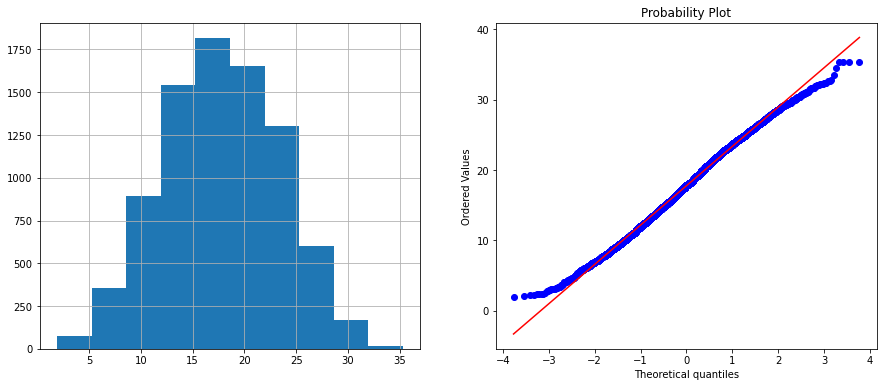

Temp3pm


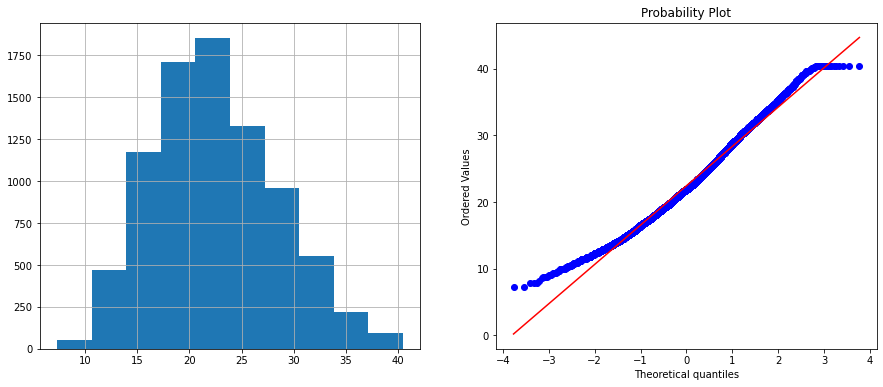

In [423]:
import scipy.stats as stats
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [424]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Date_month       0
Date_day         0
dtype: int64

In [425]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir             float64
WindGustSpeed           float64
WindDir9am              float64
WindDir3pm              float64
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                 uint8
RainTomorrow              uint8
Date_month                int64
Date_day                  int64
dtype: object

In [426]:
df["Rainfall"].value_counts()

0.0    5539
1.5    1820
0.2     406
0.4     177
0.6     116
1.2      86
1.4      84
0.8      82
1.0      77
0.1      28
0.5       7
0.7       3
Name: Rainfall, dtype: int64

[Text(0, 0, 'Albury'),
 Text(1, 0, 'CoffsHarbour'),
 Text(2, 0, 'Newcastle'),
 Text(3, 0, 'Penrith'),
 Text(4, 0, 'Williamtown'),
 Text(5, 0, 'Wollongong'),
 Text(6, 0, 'Melbourne'),
 Text(7, 0, 'Brisbane'),
 Text(8, 0, 'Adelaide'),
 Text(9, 0, 'PerthAirport'),
 Text(10, 0, 'Darwin'),
 Text(11, 0, 'Uluru')]

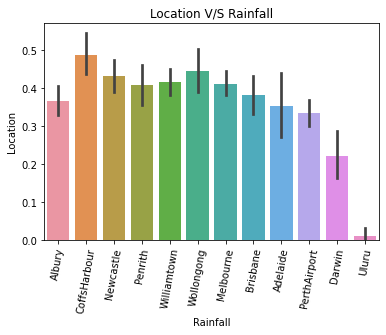

In [427]:
#Location V/S Rainfall
v3=sns.barplot(x='Location', y='Rainfall', data=df)
v3.set_title('Location V/S Rainfall')
v3.set_ylabel('Location')
v3.set_xlabel('Rainfall')
v3.set_xticklabels(v3.get_xticklabels(), rotation=80)

* > Location 3 receives highest amount of rainfall
* > Location 9 receives the lowest
* > Target column is imbalanced

# EDA Concluding Remarks
* > Dataset has two data types: float64, object, Except for the Date, Location columns, every column has missing values.
* > Date column has high cardinality which poses several problems to the model in terms of efficiency and also dimensions of data increase when encoded to numerical data.
* >  Target variable is imbalanced. It has more ‘No’ values. If data is imbalanced, then it might decrease the performance of the model. As this data is released by the meteorological department of Australia, it doesn’t make any sense when we try to balance the target variable, because the truthfulness of data might decrease. So, let me keep it as it is.
* > Sunshine feature is inversely proportional to the Rainfall feature.
* > The correlation matrix depicts that the features - MaxTemp, Pressure9am, Pressure3pm, Temp3pm and Temp9am are negatively correlated with target variable. Hence, we can drop this features in our feature selection step later.

# PreProcessing Pipeline
## Seperate the Features and the Label Column

In [428]:
x = df[['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday','RainTomorrow']]
y = df['Rainfall']


# Feature Selection

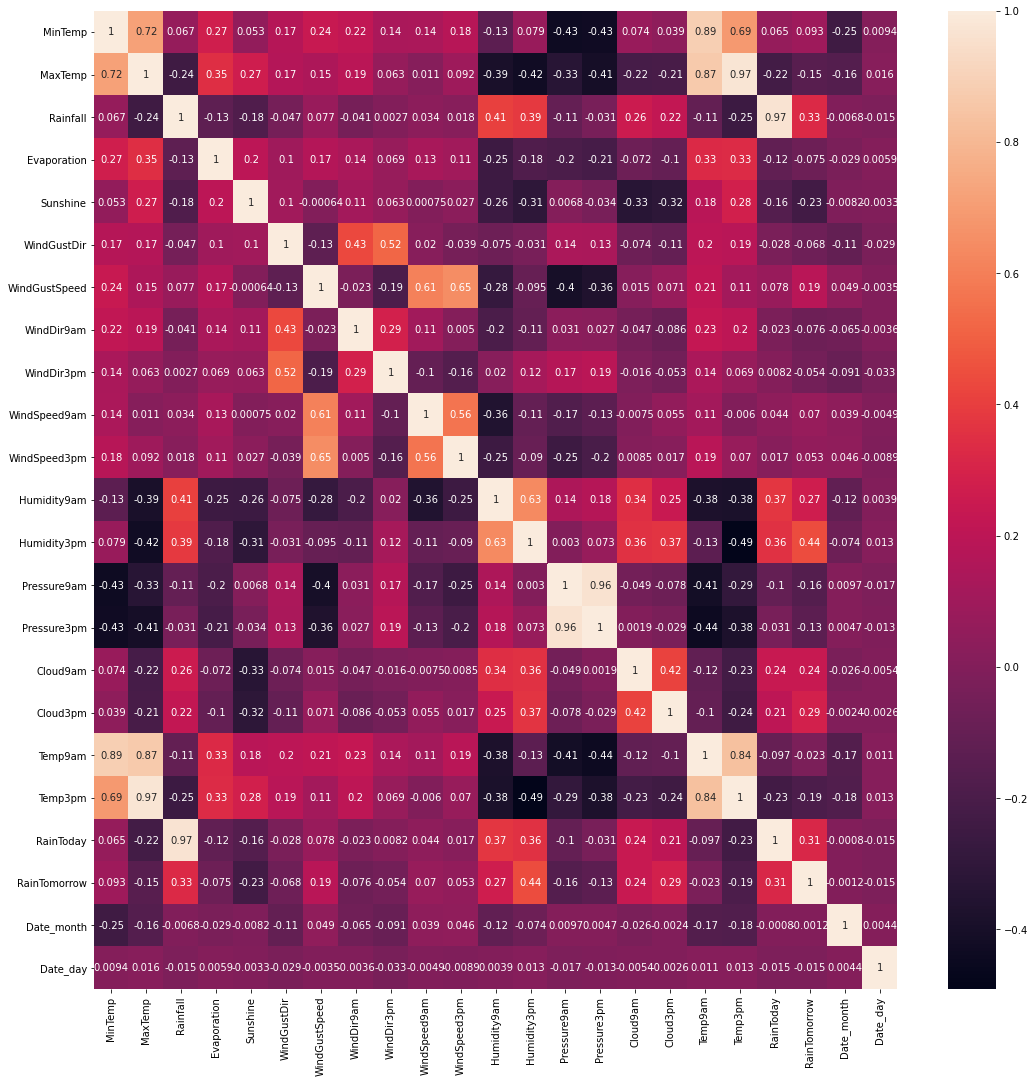

In [429]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True)

plt.show()

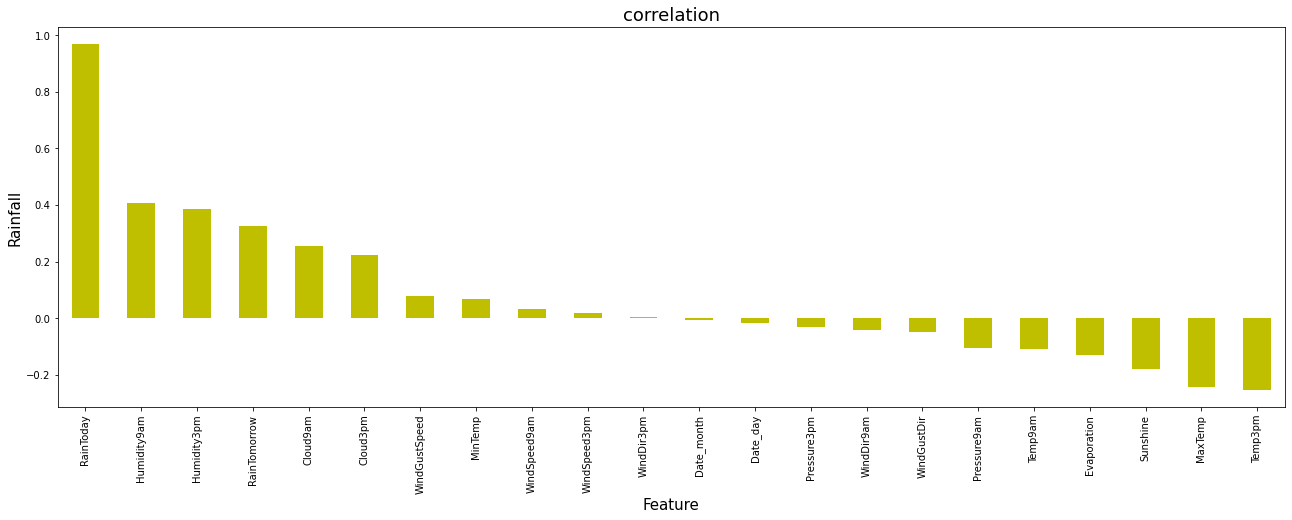

In [430]:
plt.figure(figsize=(22,7))
df.corr()['Rainfall'].sort_values(ascending = False).drop(['Rainfall']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Rainfall', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

- `RainToday` shows highest corelation

In [431]:
x.shape,y.shape

((8425, 20), (8425,))

# Data Standardization

In [432]:
# standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [433]:
dataset = sc.fit_transform(x)
X = pd.DataFrame(dataset, columns= x.columns)
X

MinTemp   MaxTemp  Evaporation  Sunshine  WindGustDir  WindGustSpeed  \
0     0.038248 -0.156288    -0.662619  1.582770    -0.681815       0.335273   
1    -1.077164  0.203684    -0.909043 -0.007275    -1.134477       0.335273   
2    -0.054703  0.301858    -0.169770  0.018371    -0.455483       0.490926   
3    -0.742540  0.678192    -1.032255  0.095308     0.902505      -1.221256   
4     0.800447  1.381773    -0.416194  1.095498    -0.681815       0.101793   
...        ...       ...          ...       ...          ...            ...   
8420 -1.932313 -0.074476     0.384685 -1.648612     1.807830      -0.676471   
8421 -1.783591  0.236408     2.294475 -0.135505    -1.587140      -1.376909   
8422 -1.448968  0.498206    -0.292982  1.377603    -0.908146      -0.209512   
8423 -1.002803  0.514568    -0.354588  1.403248     1.128836      -0.909951   
8424  0.317101 -0.090839     1.000747 -0.827944    -0.908146      -0.053860   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0      -0.278307   -1.124722      0.667323      0.592732     0.189201   
1      -1.365745   -0.433496     -1.010976      0.379826    -1.422547   
2      -0.278307   -0.433496      0.562430      0.805639    -1.780714   
3       1.461594    1.409772     -0.276720     -1.004065    -1.362853   
4       1.244107   -1.815947     -0.696295      0.166920     0.845839   
...          ...         ...           ...           ...          ...   
8420    1.461594    1.179363     -0.066933     -0.791158    -1.004687   
8421    1.461594   -1.355130     -0.066933     -1.004065    -0.706215   
8422    1.461594   -1.124722     -0.486508     -1.004065    -0.885298   
8423    1.026619   -1.355130     -0.066933     -1.216971    -1.004687   
8424    1.679082    1.640180      0.352642     -0.152440    -0.348048   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
0       -1.597239    -1.610482    -1.331695  1.188369  1.283648 -0.153693   
1       -1.433401    -1.141264    -1.217361 -1.244683 -0.182260 -0.100173   
2       -1.160339    -1.626662    -1.070361 -0.897104 -0.915214  0.577746   
3       -1.924914    -0.008669    -0.400695  1.188369  0.917171  0.060387   
4       -0.996501    -1.108904    -1.511361  0.840790  1.283648  0.006867   
...           ...          ...          ...       ...       ...       ...   
8420    -1.488014     1.123926     0.824305  1.188369 -0.182260 -1.366811   
8421    -1.651851     0.945947     0.628305 -1.244683 -1.281691 -1.224092   
8422    -1.488014     0.541449     0.252638  0.493211  0.184217 -0.938652   
8423    -1.488014     0.282570     0.203638 -0.549525 -0.915214 -0.474812   
8424    -0.832664     0.412009     0.432305  1.188369  1.283648 -0.492652   

       Temp3pm  RainToday  RainTomorrow  
0    -0.106696  -0.556099     -0.556282  
1     0.314589  -0.556099     -0.556282  
2     0.129224  -0.556099     -0.556282  
3     0.685320  -0.556099     -0.556282  
4     1.224565  -0.556099     -0.556282  
...        ...        ...           ...  
8420 -0.005587  -0.556099     -0.556282  
8421  0.348292  -0.556099     -0.556282  
8422  0.617914  -0.556099     -0.556282  
8423  0.601063  -0.556099     -0.556282  
8424 -0.258358  -0.556099     -0.556282  

[8425 rows x 20 columns]

In [434]:

x.shape,y.shape

((8425, 20), (8425,))

# Building Machine Learning Model

In [436]:
#Importing the models

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [437]:
#  check the best possible random state to train our model.
MaX_r2_score=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scores = r2_score(y_test,y_pred)
    if r2_scores>MaX_r2_score:
        MaX_r2_score = r2_scores
        random_state = i
    
print("MaX R2 score corresponding to random state",random_state,"is",MaX_r2_score)

MaX R2 score corresponding to random state 143 is 0.9570980001344854


In [438]:
# Split the data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=143)

In [439]:
# Check the best kernellist for SVR model
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.9256919310320945
0.9375782111697402
0.9485930088259911


In [440]:
sv=SVR(kernel='linear')
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()
ls=Lasso()
rd=Ridge()

model=[lr,sv,dt,rf,kn,ab,gb,ls,rd]
kf = KFold(n_splits=5, random_state=54, shuffle=True)

train=[]
test=[]
Mse=[]
cv=[]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score*100)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score*100)
    mse = mean_squared_error(y_test,pred_test)
    Mse.append(mse)
    score=cross_val_score(m,X,y,cv=kf)
    cv.append(score.mean()*100)
    
Performance={'Model':['Linear Regression','SupportVector','DecisionTree','RandomForest','KNN','AdaBoost','GradientBoosting','Lasso','Ridge'],
             'Training Score':train,
            'Test Score':test,
            'Mean Square Error':Mse,
            'Cross Validation Score': cv}
Performance=pd.DataFrame(data=Performance)
Performance

Model  Training Score  Test Score  Mean Square Error  \
0  Linear Regression       93.751059   95.709800           0.017178   
1      SupportVector       92.569193   94.610936           0.021578   
2       DecisionTree      100.000000   91.728032           0.033122   
3       RandomForest       99.303772   96.397040           0.014427   
4                KNN       94.605114   93.248971           0.027032   
5           AdaBoost       92.668301   93.944903           0.024245   
6   GradientBoosting       94.785202   95.921521           0.016331   
7              Lasso        0.000000   -0.007980           0.400440   
8              Ridge       93.751057   95.709563           0.017179   

   Cross Validation Score  
0               94.101246  
1               92.961547  
2               90.633878  
3               95.359840  
4               92.060167  
5               92.696791  
6               94.379188  
7               -0.087227  
8               94.101285

# Hyper Parameter Tuning with RandomForest

In [42]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [43]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [45]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = clf4, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [46]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [47]:
# looking at best parameters
rf_random.best_params_


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [48]:
prediction = rf_random.predict(X_test)

Accuracy = 0.9626590069757899
ROC Area under Curve = 0.9633966843102607
Cohen's Kappa = 0.9247469672892423
Time taken = 0.8596584796905518
              precision    recall  f1-score   support

         0.0    0.97561   0.95594   0.96567      1339
         1.0    0.94756   0.97086   0.95906      1098

    accuracy                        0.96266      2437
   macro avg    0.96158   0.96340   0.96237      2437
weighted avg    0.96297   0.96266   0.96270      2437



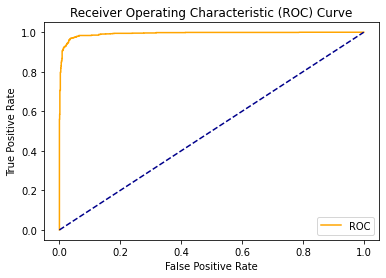

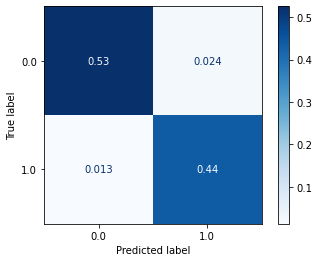

In [52]:
rf_random, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(rf_random, X_train, y_train, X_test, y_test)

RandomForestClassifier Performance
---------------------------------------------------
Accuracy Score 0.9671727533853098
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1339
         1.0       0.95      0.98      0.96      1098

    accuracy                           0.97      2437
   macro avg       0.97      0.97      0.97      2437
weighted avg       0.97      0.97      0.97      2437



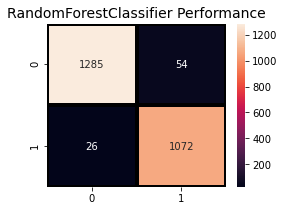

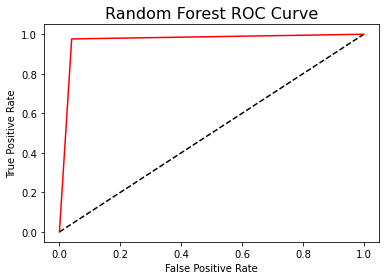

In [53]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
print('RandomForestRegressor Performance')
print('---------------------------------------------------')
print('Accuracy Score', accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RandomForestClassifier Performance",fontsize=14)
plt.show()

fpr_rf, tpr_rf, thresholds = roc_curve(y_test,prediction)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

#### If we observe the above metrics, We got good values with hyperparameter tuning model compare to model without hyper parameter tuning with Random Forest Regressor, Increased accuracy by 4 %

# Concluding Remarks
* > we explored and applied several preprocessing steps and learned there impact on the overall performance of our classifiers. We also carried a comparative study of all the classifiers with different input data and observed how the input data can affect the model predictions and thus, we successfully predicted both the models with best Accuracy!
![rain](https://i.pinimg.com/originals/65/9b/fd/659bfda6513a67a12ff9adc8b1b371c9.gif)